In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as sm
import scipy.stats as stats
import pandas_profiling 
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
from patsy import dmatrices
plt.rcParams['axes.grid'] = True
plt.gray()

<Figure size 432x288 with 0 Axes>

In [3]:
pam=pd.read_csv('C:\\Users\\HP\\Desktop\\AnalytixLabs\\DATA SCIENCE\\Logistic Case Study\\Proactive Attrition Management-Logistic Regression Case Study\\Proactive Attrition Management-Logistic Regression Case Study.csv')

In [4]:
pam.head()

REVENUE      MOU  RECCHRGE  DIRECTAS  OVERAGE  ROAM  CHANGEM  CHANGER  \
0    57.49   482.75     37.43      0.25    22.75   0.0   532.25    50.99   
1    82.28  1312.25     75.00      1.24     0.00   0.0   156.75     8.14   
2    31.66    25.50     29.99      0.25     0.00   0.0    59.50     4.03   
3    62.13    97.50     65.99      2.48     0.00   0.0    23.50     6.82   
4    25.23     2.50     25.00      0.00     0.00   0.0    -2.50    -0.23   

   DROPVCE  BLCKVCE    ...     REFER  INCMISS  INCOME  MCYCLE  CREDITAD  \
0     8.33     1.00    ...         0        0       5       0         1   
1    52.00     7.67    ...         0        0       6       0         0   
2     0.00     1.00    ...         0        0       9       0         1   
3     0.00     0.33    ...         0        0       6       0         0   
4     0.00     0.00    ...         0        0       7       0         0   

   SETPRCM  SETPRC  RETCALL  CALIBRAT  CHURNDEP  
0        0  149.99        0         0       NaN  
1        0    9.99        0         0       NaN  
2        0   29.99        0         0       NaN  
3        0   29.99        0         0       NaN  
4        0   29.99        0         0       NaN  

[5 rows x 78 columns]

In [5]:
pam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71047 entries, 0 to 71046
Data columns (total 78 columns):
REVENUE     70831 non-null float64
MOU         70831 non-null float64
RECCHRGE    70831 non-null float64
DIRECTAS    70831 non-null float64
OVERAGE     70831 non-null float64
ROAM        70831 non-null float64
CHANGEM     70545 non-null float64
CHANGER     70545 non-null float64
DROPVCE     71047 non-null float64
BLCKVCE     71047 non-null float64
UNANSVCE    71047 non-null float64
CUSTCARE    71047 non-null float64
THREEWAY    71047 non-null float64
MOUREC      71047 non-null float64
OUTCALLS    71047 non-null float64
INCALLS     71047 non-null float64
PEAKVCE     71047 non-null float64
OPEAKVCE    71047 non-null float64
DROPBLK     71047 non-null float64
CALLFWDV    71047 non-null float64
CALLWAIT    71047 non-null float64
CHURN       71047 non-null int64
MONTHS      71047 non-null int64
UNIQSUBS    71047 non-null int64
ACTVSUBS    71047 non-null int64
CSA         71019 non-nu

In [6]:
pam.describe()

REVENUE           MOU      RECCHRGE      DIRECTAS       OVERAGE  \
count  70831.000000  70831.000000  70831.000000  70831.000000  70831.000000   
mean      58.853961    525.728392     46.876492      0.894801     40.095360   
std       44.243613    530.134259     23.915103      2.197815     96.347103   
min       -6.170000      0.000000    -11.290000      0.000000      0.000000   
25%       33.640000    158.250000     30.000000      0.000000      0.000000   
50%       48.530000    366.000000     44.990000      0.250000      2.500000   
75%       71.030000    721.750000     59.990000      0.990000     40.750000   
max     1223.380000   7667.750000    399.990000    159.390000   4320.750000   

               ROAM       CHANGEM       CHANGER       DROPVCE       BLCKVCE  \
count  70831.000000  70545.000000  70545.000000  71047.000000  71047.000000   
mean       1.221526    -10.846461     -1.205926      6.009928      4.067696   
std        9.081196    255.314315     38.770695      9.006175     10.670823   
min        0.000000  -3875.000000  -1107.740000      0.000000      0.000000   
25%        0.000000    -83.000000     -7.110000      0.670000      0.000000   
50%        0.000000     -5.000000     -0.290000      3.000000      1.000000   
75%        0.260000     65.750000      1.600000      7.670000      3.670000   
max     1112.450000   5192.250000   2483.480000    221.670000    384.330000   

           ...              REFER       INCMISS        INCOME        MCYCLE  \
count      ...       71047.000000  71047.000000  71047.000000  71047.000000   
mean       ...           0.050854      0.249835      4.334229      0.013456   
std        ...           0.290444      0.432920      3.137063      0.115217   
min        ...           0.000000      0.000000      0.000000      0.000000   
25%        ...           0.000000      0.000000      1.000000      0.000000   
50%        ...           0.000000      0.000000      5.000000      0.000000   
75%        ...           0.000000      0.000000      7.000000      0.000000   
max        ...          35.000000      1.000000      9.000000      1.000000   

           CREDITAD       SETPRCM        SETPRC       RETCALL      CALIBRAT  \
count  71047.000000  71047.000000  71047.000000  71047.000000  71047.000000   
mean       0.053162      0.566512     35.798584      0.034034      0.563008   
std        0.374988      0.495560     57.040964      0.181317      0.496018   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      1.000000      0.000000      0.000000      1.000000   
75%        0.000000      1.000000     39.990000      0.000000      1.000000   
max       25.000000      1.000000    499.990000      1.000000      1.000000   

           CHURNDEP  
count  40000.000000  
mean       0.500000  
std        0.500006  
min        0.000000  
25%        0.000000  
50%        0.500000  
75%        1.000000  
max        1.000000  

[8 rows x 77 columns]

In [7]:
pam.columns

Index(['REVENUE', 'MOU', 'RECCHRGE', 'DIRECTAS', 'OVERAGE', 'ROAM', 'CHANGEM',
       'CHANGER', 'DROPVCE', 'BLCKVCE', 'UNANSVCE', 'CUSTCARE', 'THREEWAY',
       'MOUREC', 'OUTCALLS', 'INCALLS', 'PEAKVCE', 'OPEAKVCE', 'DROPBLK',
       'CALLFWDV', 'CALLWAIT', 'CHURN', 'MONTHS', 'UNIQSUBS', 'ACTVSUBS',
       'CSA', 'PHONES', 'MODELS', 'EQPDAYS', 'CUSTOMER', 'AGE1', 'AGE2',
       'CHILDREN', 'CREDITA', 'CREDITAA', 'CREDITB', 'CREDITC', 'CREDITDE',
       'CREDITGY', 'CREDITZ', 'PRIZMRUR', 'PRIZMUB', 'PRIZMTWN', 'REFURB',
       'WEBCAP', 'TRUCK', 'RV', 'OCCPROF', 'OCCCLER', 'OCCCRFT', 'OCCSTUD',
       'OCCHMKR', 'OCCRET', 'OCCSELF', 'OWNRENT', 'MARRYUN', 'MARRYYES',
       'MARRYNO', 'MAILORD', 'MAILRES', 'MAILFLAG', 'TRAVEL', 'PCOWN',
       'CREDITCD', 'RETCALLS', 'RETACCPT', 'NEWCELLY', 'NEWCELLN', 'REFER',
       'INCMISS', 'INCOME', 'MCYCLE', 'CREDITAD', 'SETPRCM', 'SETPRC',
       'RETCALL', 'CALIBRAT', 'CHURNDEP'],
      dtype='object')

In [210]:
 pandas_profiling.ProfileReport(pam)

In [8]:

#pam=pam.drop(['CHURNDEP','MAILRES','CSA'],axis=1)

In [126]:
num_var=['REVENUE', 'MOU', 'RECCHRGE', 'DIRECTAS', 'OVERAGE', 'ROAM', 'CHANGEM', 'CHANGER', 'DROPVCE','BLCKVCE', 'UNANSVCE',
             'CUSTCARE', 'THREEWAY', 'MOUREC', 'OUTCALLS', 'INCALLS',  'PEAKVCE',
            'OPEAKVCE', 'DROPBLK',  'CALLFWDV', 'CALLWAIT', 'MONTHS', 'UNIQSUBS', 'PHONES',  
            'MODELS', 'EQPDAYS', 'CUSTOMER', 'AGE1', 'AGE2',   'INCOME', 'SETPRC','ACTVSUBS']
pam_num=pam[num_var]

In [127]:
pam_cat=pam[[ 'CHILDREN', 'CREDITA', 'CREDITAA', 'CREDITB', 'CREDITC', 'CREDITDE','RETCALLS',
             'CREDITGY', 'CREDITZ', 'PRIZMRUR', 'PRIZMUB', 'PRIZMTWN', 'REFURB', 'RETACCPT',
             'WEBCAP', 'TRUCK', 'RV', 'OCCPROF', 'OCCCLER', 'OCCCRFT', 'OCCSTUD', 'OCCHMKR',
             'OCCRET', 'OCCSELF', 'OWNRENT', 'MARRYUN', 'MARRYYES', 'MARRYNO','CREDITAD',
              'MAILFLAG', 'TRAVEL', 'PCOWN', 'CREDITCD', 'NEWCELLY', 'NEWCELLN','MCYCLE',
             'INCMISS', 'SETPRCM', 'RETCALL','CHURN']]
cat_var=pam_cat.columns.difference( ['CHURN'] )

In [128]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=pam_num.apply(lambda x: var_summary(x)).T
num_summary.to_csv('num_summary.csv')

In [129]:
num_summary

N   NMISS           SUM          MEAN      MEDIAN  \
REVENUE   70831.0   216.0  4.168685e+06  5.885396e+01       48.53   
MOU       70831.0   216.0  3.723787e+07  5.257284e+02      366.00   
RECCHRGE  70831.0   216.0  3.320309e+06  4.687649e+01       44.99   
DIRECTAS  70831.0   216.0  6.337966e+04  8.948011e-01        0.25   
OVERAGE   70831.0   216.0  2.839994e+06  4.009536e+01        2.50   
ROAM      70831.0   216.0  8.652192e+04  1.221526e+00        0.00   
CHANGEM   70545.0   502.0 -7.651636e+05 -1.084646e+01       -5.00   
CHANGER   70545.0   502.0 -8.507202e+04 -1.205926e+00       -0.29   
DROPVCE   71047.0     0.0  4.269873e+05  6.009928e+00        3.00   
BLCKVCE   71047.0     0.0  2.889976e+05  4.067696e+00        1.00   
UNANSVCE  71047.0     0.0  2.014601e+06  2.835589e+01       16.33   
CUSTCARE  71047.0     0.0  1.325605e+05  1.865814e+00        0.00   
THREEWAY  71047.0     0.0  2.130974e+04  2.999386e-01        0.00   
MOUREC    71047.0     0.0  8.165810e+06  1.149353e+02       52.50   
OUTCALLS  71047.0     0.0  1.804345e+06  2.539650e+01       13.67   
INCALLS   71047.0     0.0  5.809312e+05  8.176717e+00        2.00   
PEAKVCE   71047.0     0.0  6.435505e+06  9.058095e+01       62.00   
OPEAKVCE  71047.0     0.0  4.818294e+06  6.781841e+01       35.67   
DROPBLK   71047.0     0.0  7.211057e+05  1.014970e+01        5.33   
CALLFWDV  71047.0     0.0  8.407400e+02  1.183357e-02        0.00   
CALLWAIT  71047.0     0.0  1.316413e+05  1.852877e+00        0.33   
MONTHS    71047.0     0.0  1.332190e+06  1.875083e+01       16.00   
UNIQSUBS  71047.0     0.0  1.086700e+05  1.529551e+00        1.00   
PHONES    71046.0     1.0  1.284950e+05  1.808617e+00        1.00   
MODELS    71046.0     1.0  1.109590e+05  1.561791e+00        1.00   
EQPDAYS   71046.0     1.0  2.701635e+07  3.802656e+02      330.00   
CUSTOMER  71047.0     0.0  7.463398e+10  1.050487e+06  1050370.00   
AGE1      69803.0  1244.0  2.190077e+06  3.137511e+01       36.00   
AGE2      69803.0  1244.0  1.476872e+06  2.115772e+01        0.00   
INCOME    71047.0     0.0  3.079340e+05  4.334229e+00        5.00   
SETPRC    71047.0     0.0  2.543382e+06  3.579858e+01        0.00   
ACTVSUBS  71047.0     0.0  9.603100e+04  1.351655e+00        1.00   

                   STD           VAR         MIN           P1           P5  \
REVENUE      44.243613  1.957497e+03       -6.17       10.000       15.515   
MOU         530.134259  2.810423e+05        0.00        0.000       20.415   
RECCHRGE     23.915103  5.719322e+02      -11.29        9.190       10.000   
DIRECTAS      2.197815  4.830390e+00        0.00        0.000        0.000   
OVERAGE      96.347103  9.282764e+03        0.00        0.000        0.000   
ROAM          9.081196  8.246812e+01        0.00        0.000        0.000   
CHANGEM     255.314315  6.518540e+04    -3875.00     -831.890     -376.250   
CHANGER      38.770695  1.503167e+03    -1107.74     -104.536      -47.500   
DROPVCE       9.006175  8.111118e+01        0.00        0.000        0.000   
BLCKVCE      10.670823  1.138665e+02        0.00        0.000        0.000   
UNANSVCE     38.904234  1.513539e+03        0.00        0.000        0.000   
CUSTCARE      5.160799  2.663385e+01        0.00        0.000        0.000   
THREEWAY      1.161602  1.349319e+00        0.00        0.000        0.000   
MOUREC      166.305718  2.765759e+04        0.00        0.000        0.000   
OUTCALLS     35.147525  1.235349e+03        0.00        0.000        0.000   
INCALLS      16.519107  2.728809e+02        0.00        0.000        0.000   
PEAKVCE     104.914876  1.100713e+04        0.00        0.000        0.000   
OPEAKVCE     93.328993  8.710301e+03        0.00        0.000        0.000   
DROPBLK      15.460614  2.390306e+02        0.00        0.000        0.000   
CALLFWDV      0.562193  3.160611e-01        0.00        0.000        0.000   
CALLWAIT      5.556259  3.087202e+01        0.00        0.000        0.000   
MONTHS        9.787568

In [130]:
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

pam_num=pam_num.apply(lambda x: outlier_capping(x))

In [131]:
def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x
pam_num=pam_num.apply(lambda x: Missing_imputation(x))

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


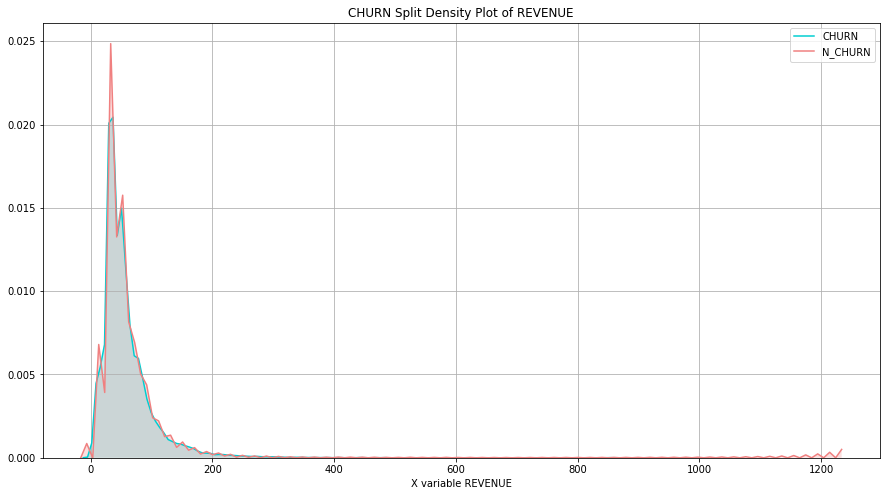

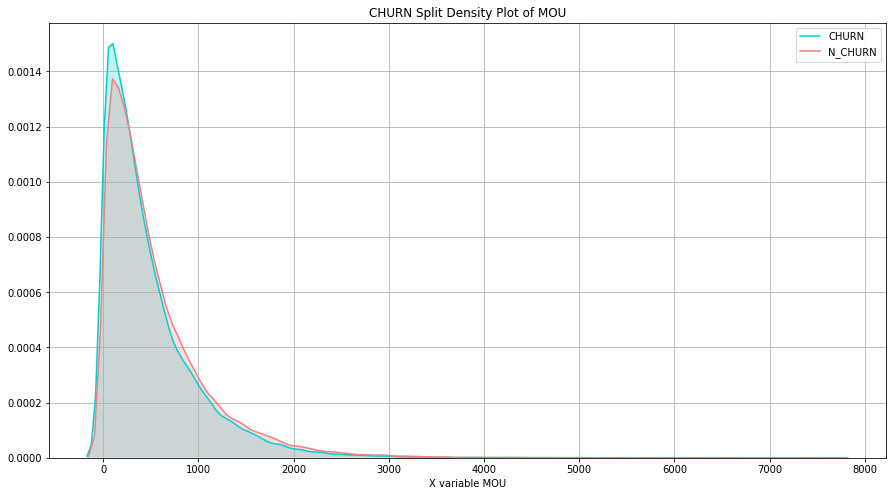

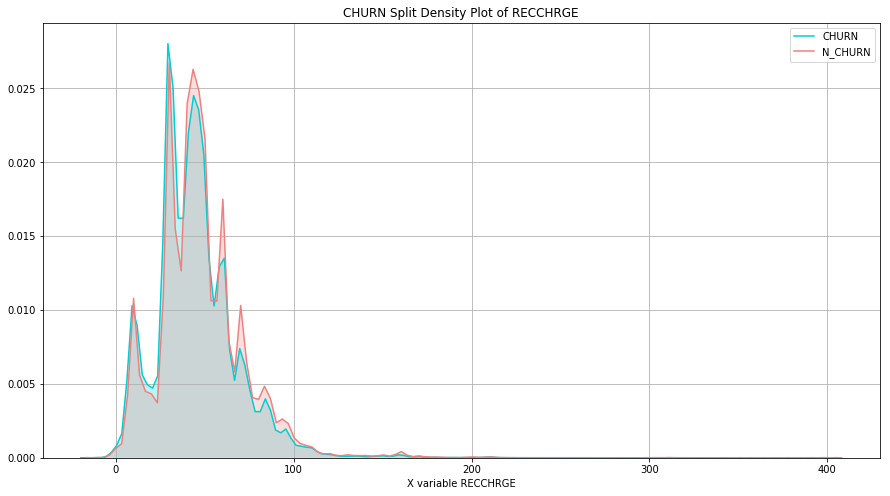

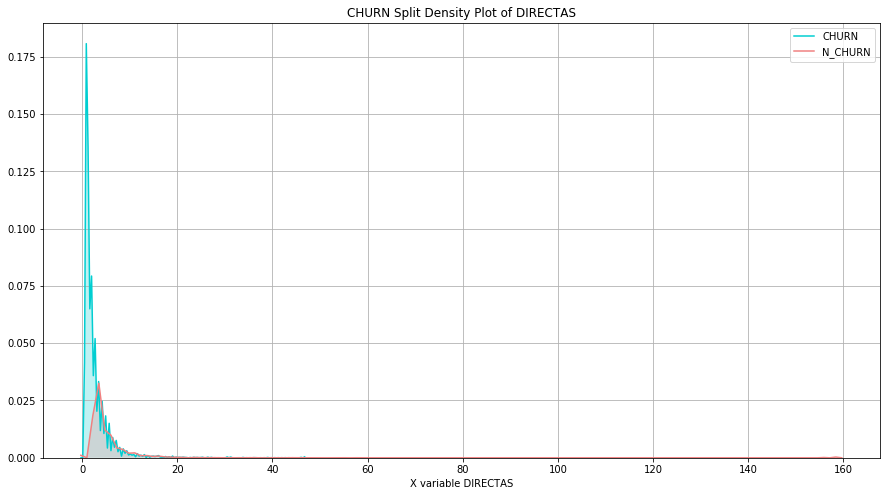

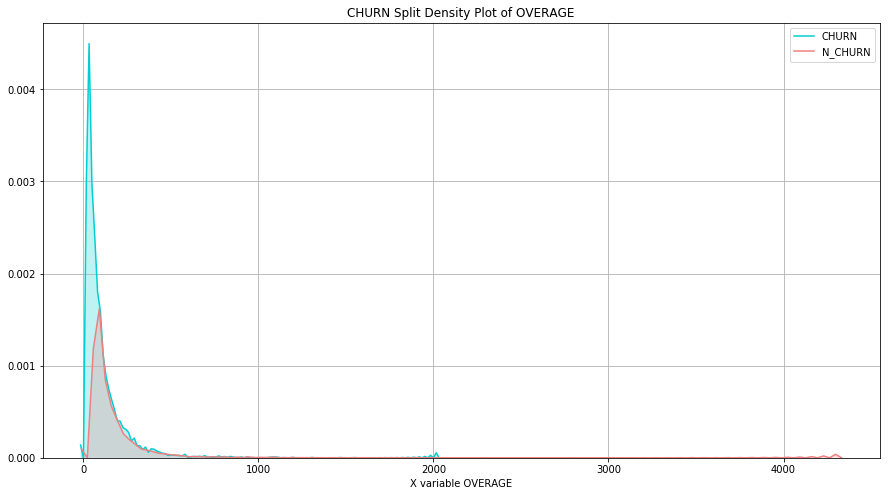

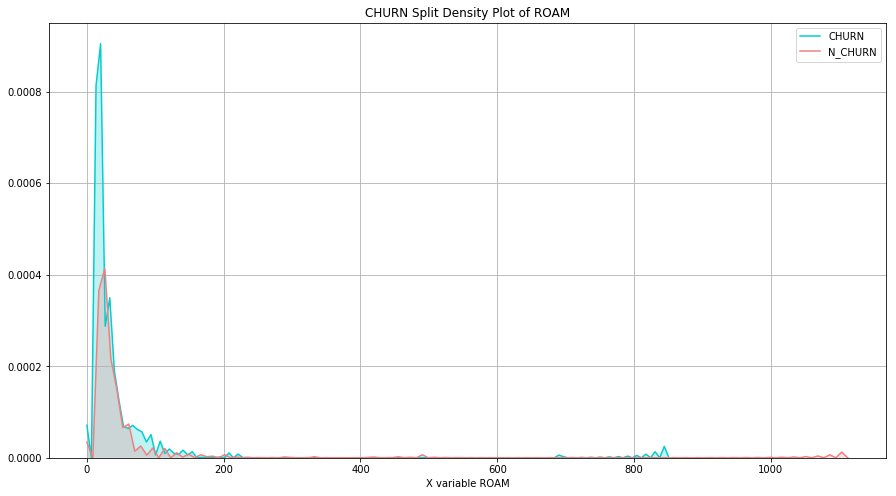

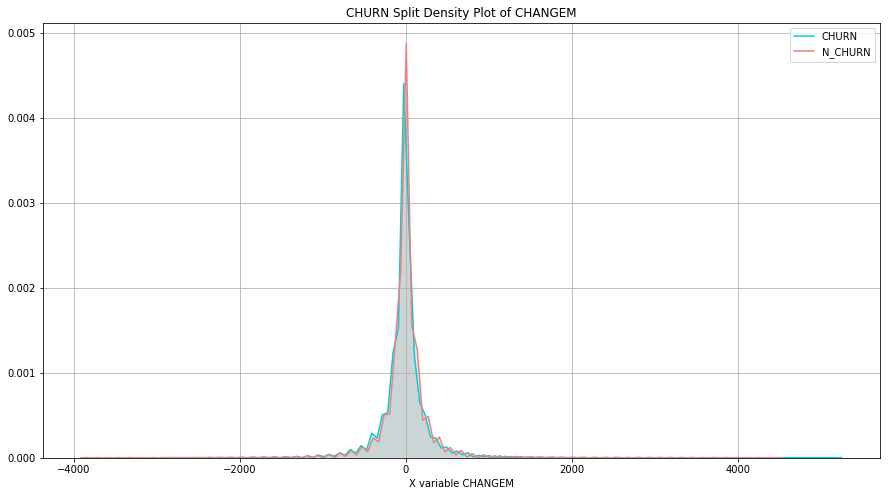

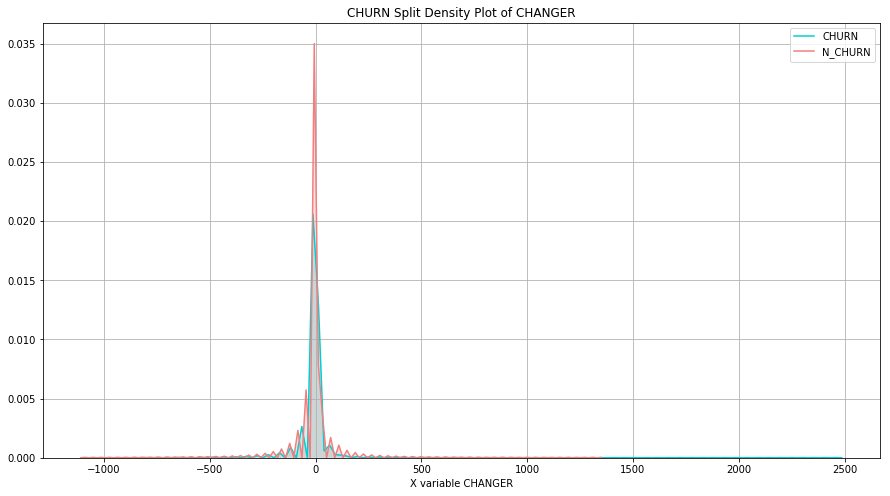

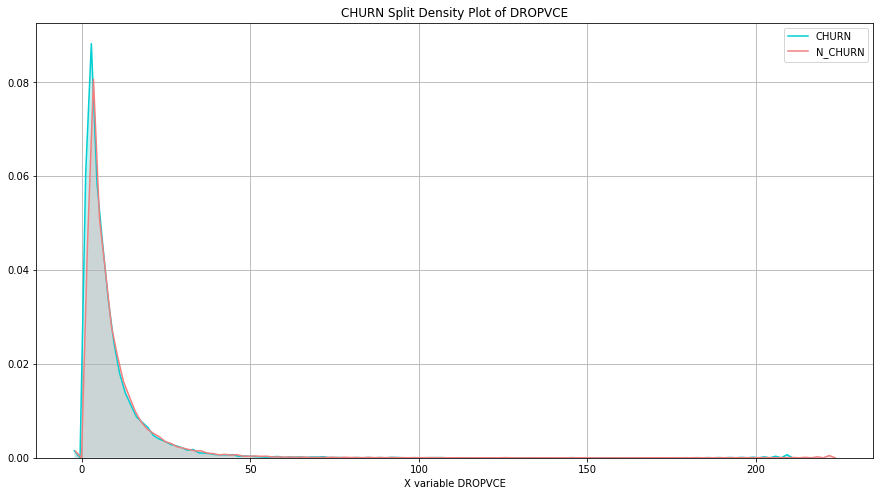

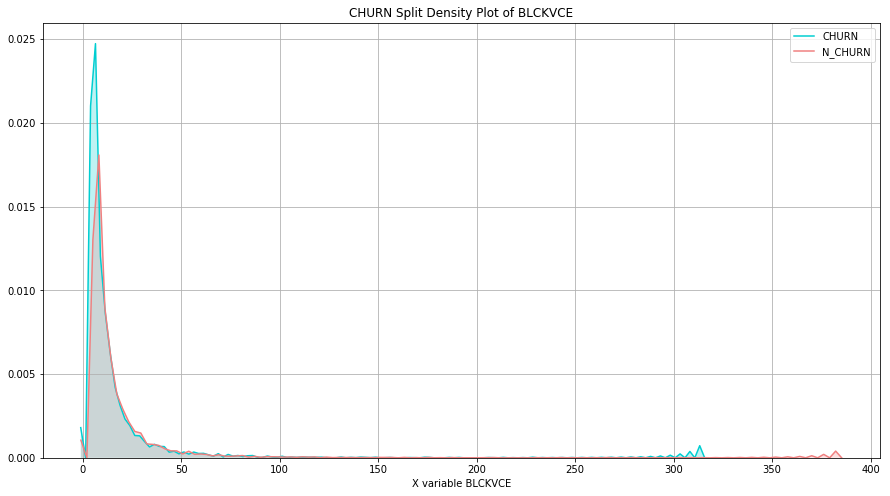

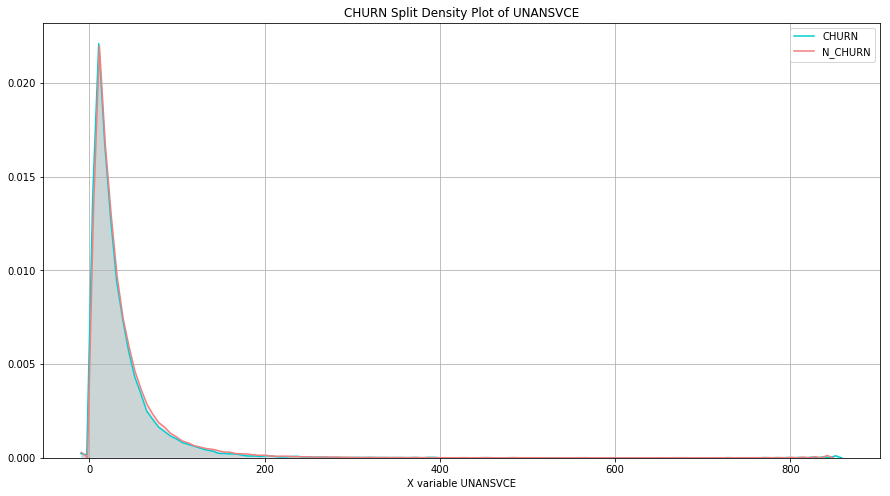

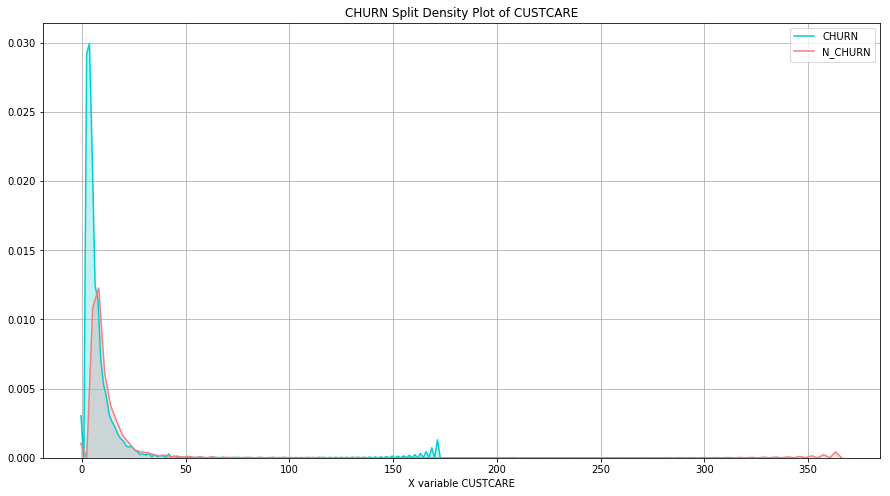

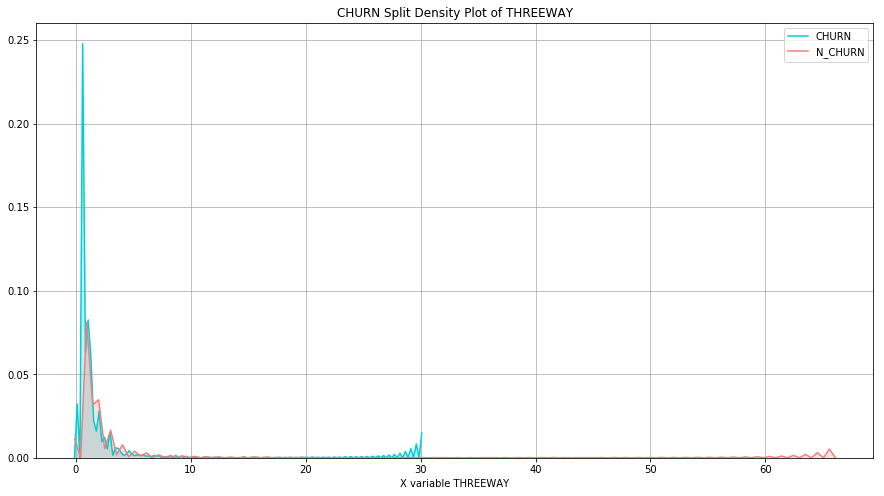

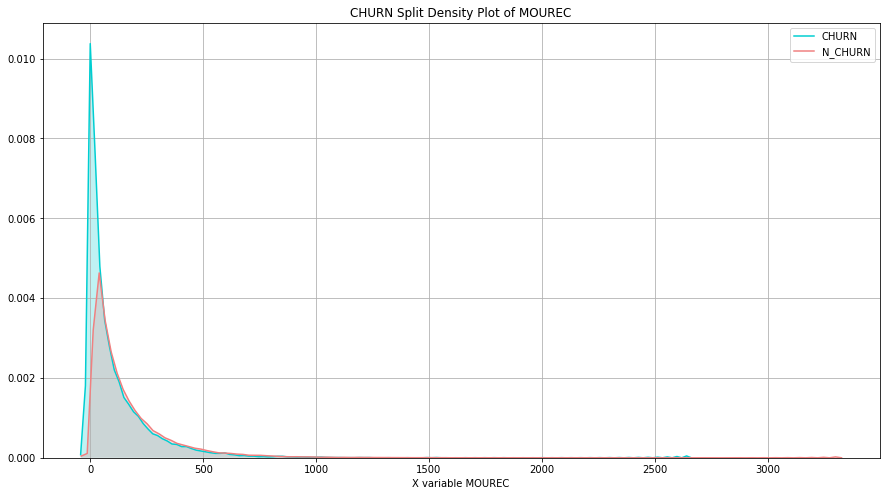

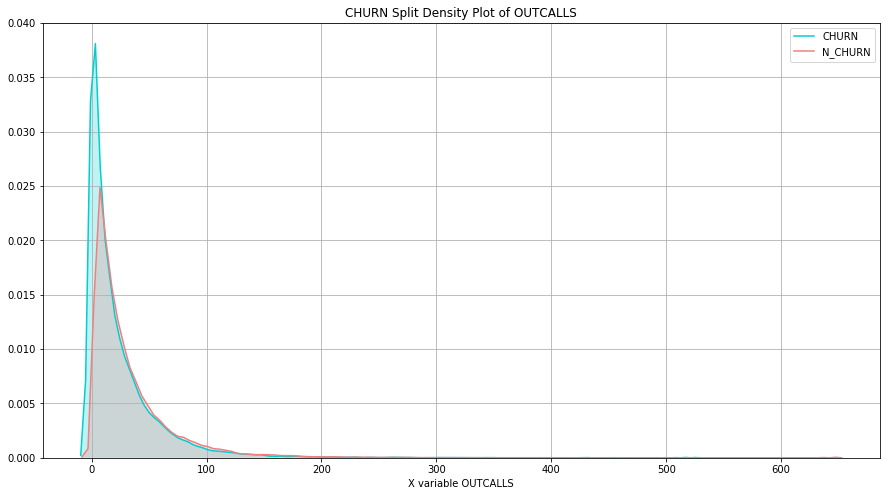

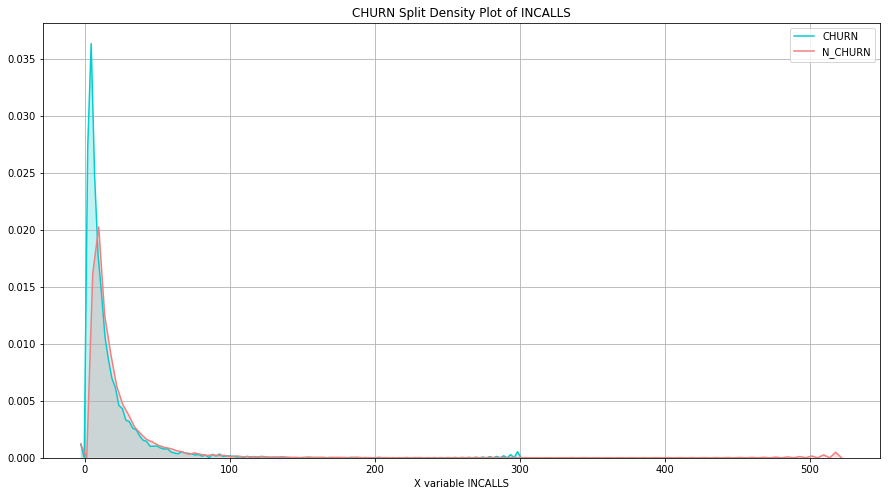

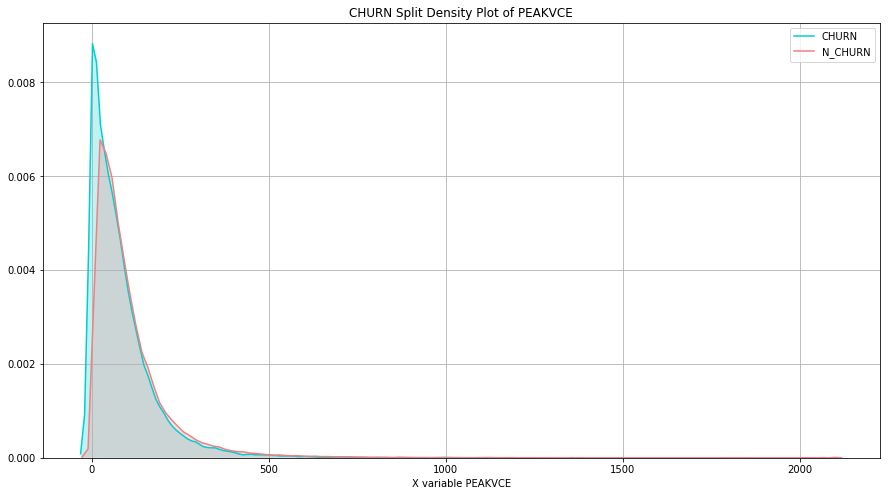

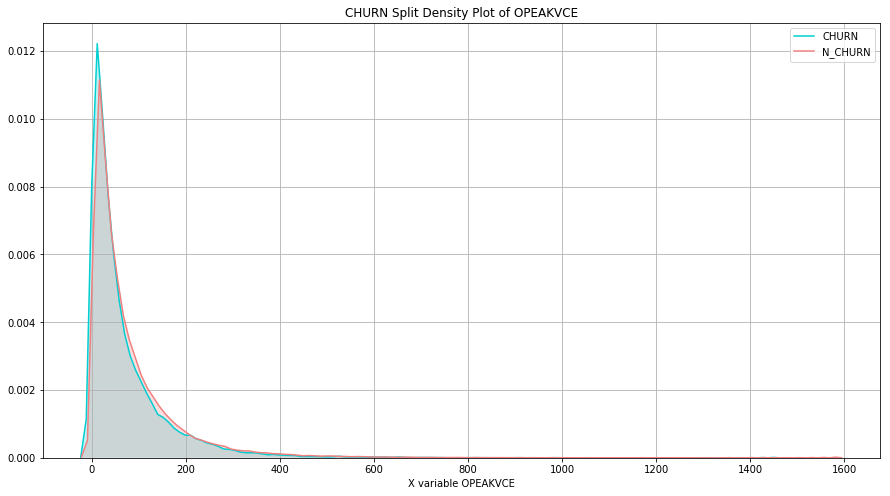

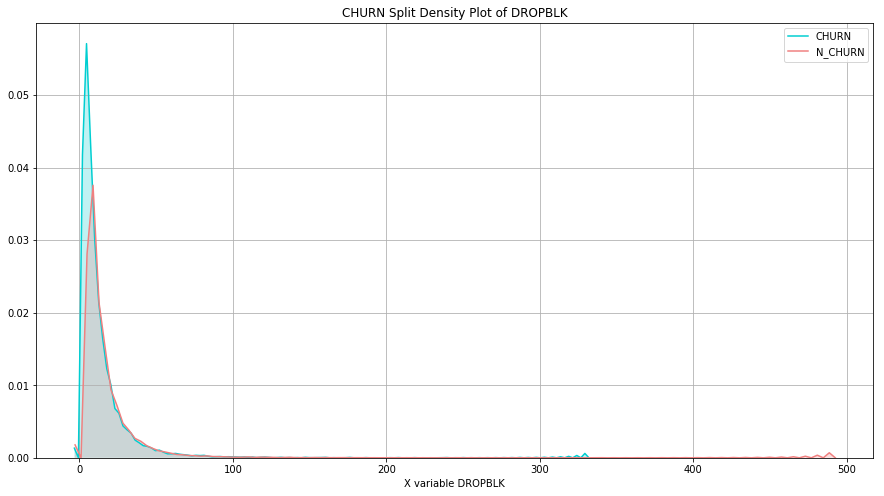

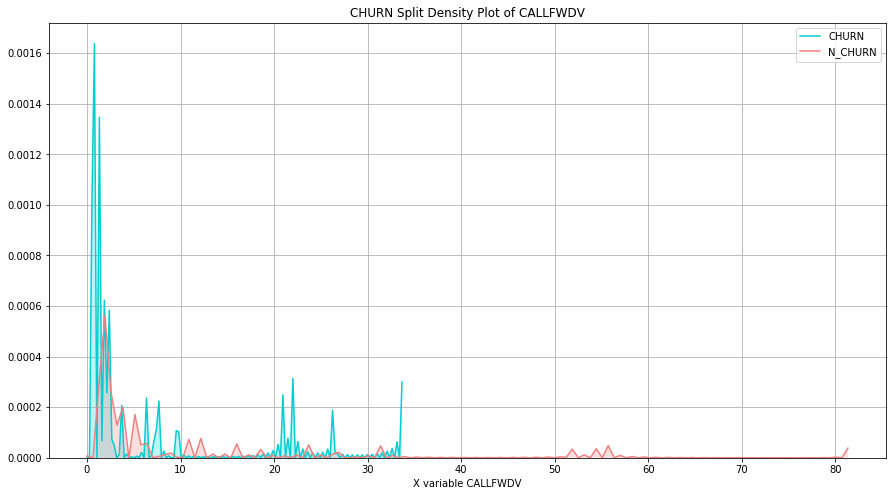

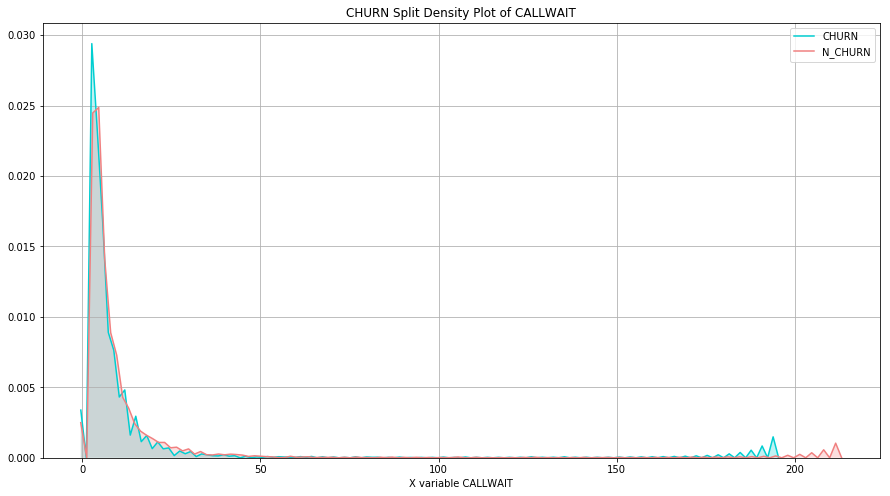

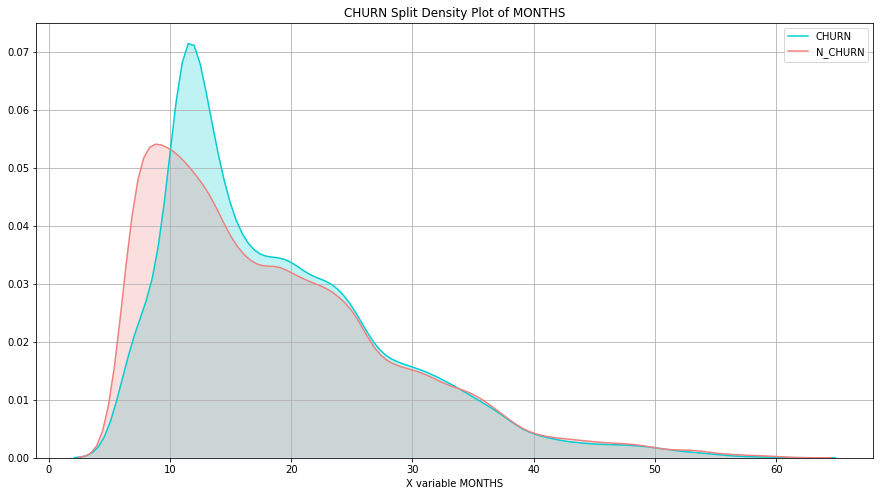

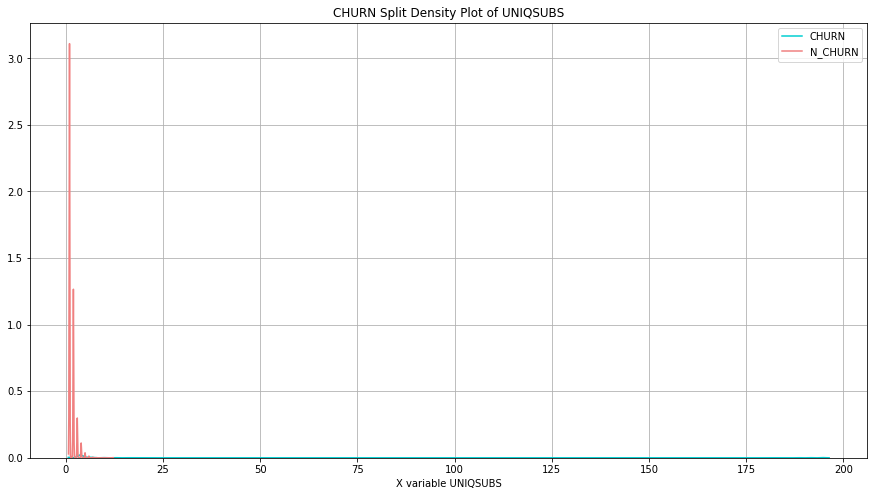

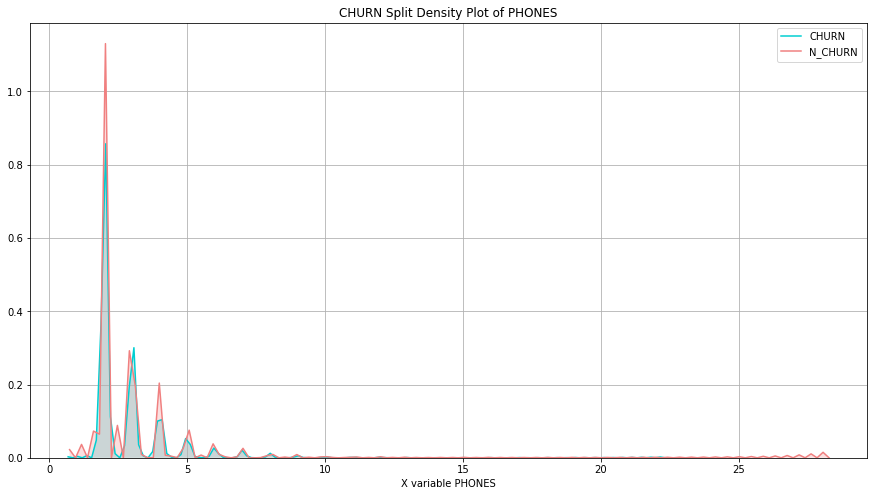

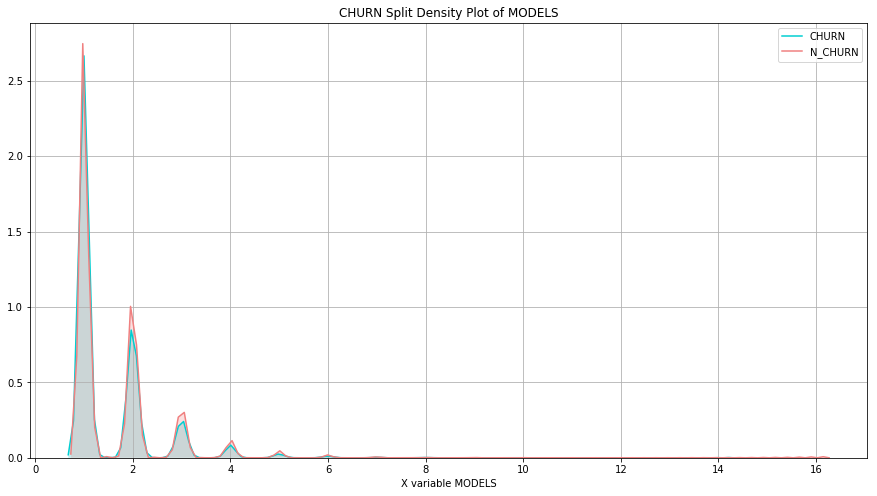

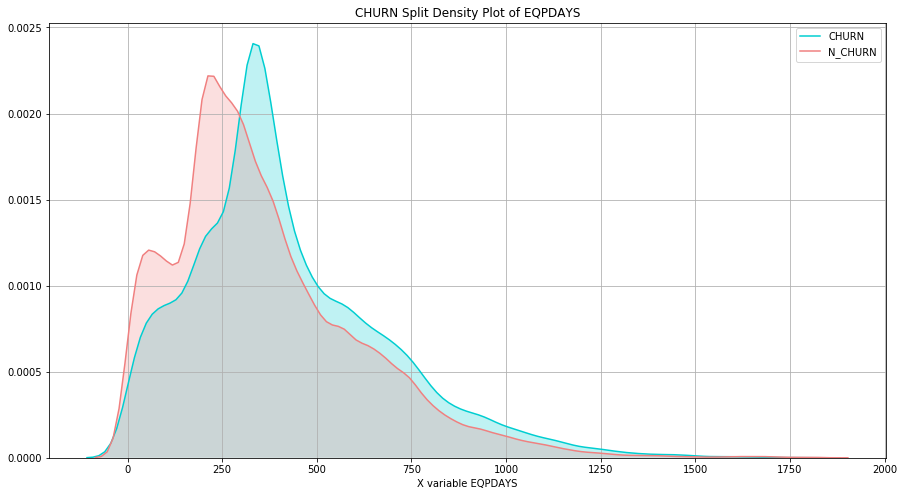

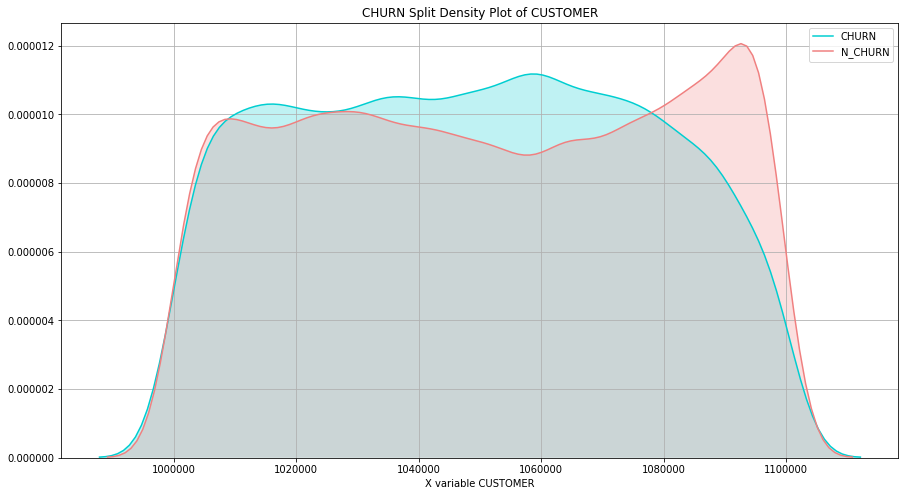

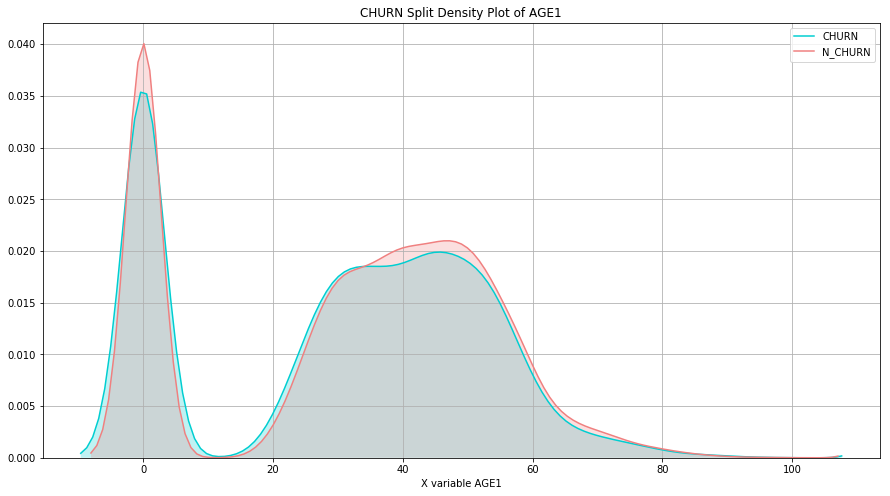

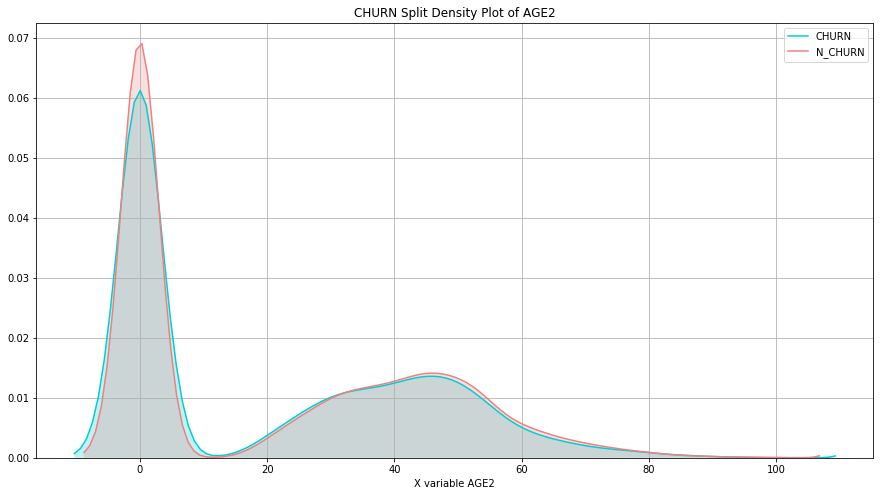

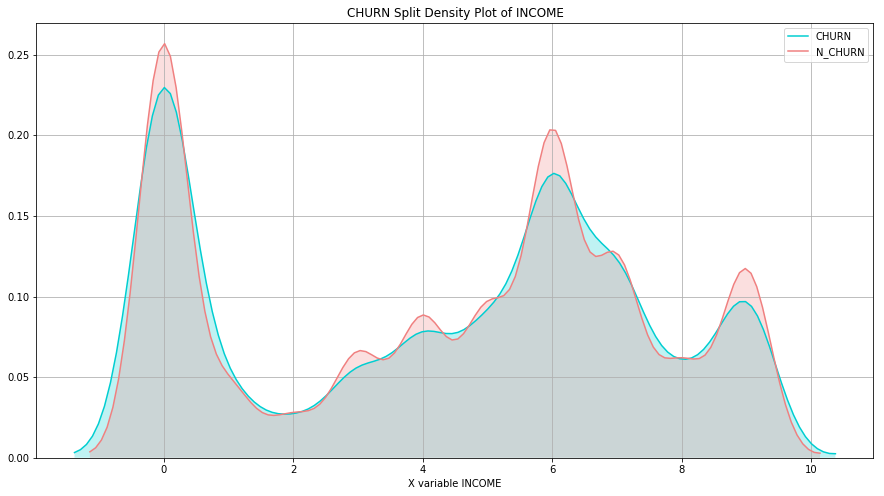

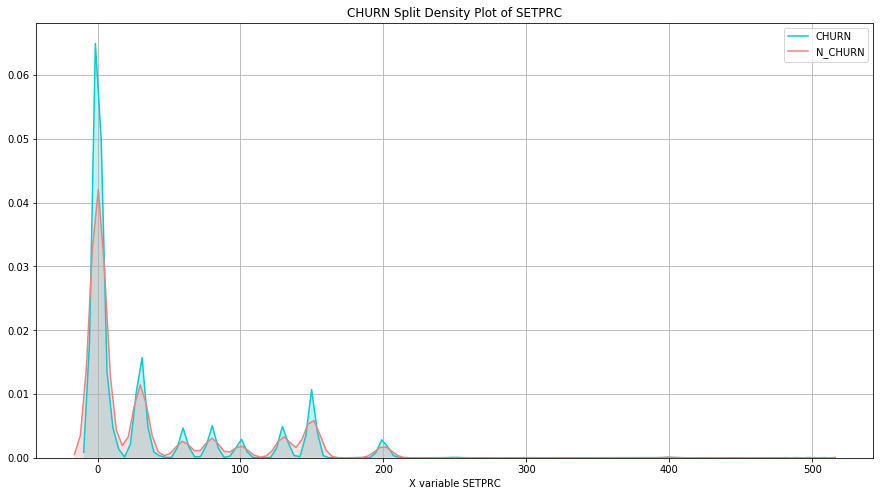

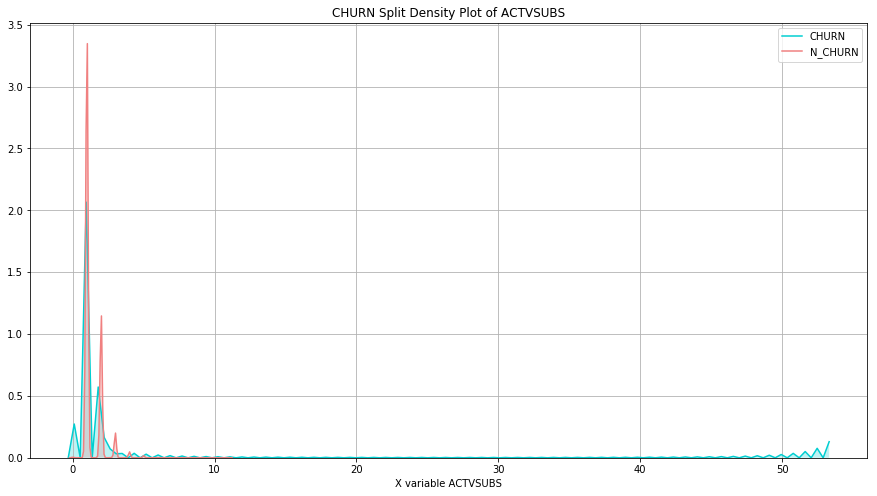

In [132]:

bp = PdfPages('Density Plots  with Attrition Split.pdf')
for num_variable in num_var:
    fig,axes = plt.subplots(figsize=(15,8))
    ax = sns.kdeplot(pam[num_variable][pam.CHURN == 1], color="darkturquoise", shade=True)
    sns.kdeplot(pam[num_variable][pam.CHURN == 0], color="lightcoral", shade=True)
    plt.legend(['CHURN', 'N_CHURN'])
    plt.title(str('CHURN Split Density Plot of ')+str(num_variable))
    ax.set(xlabel=str("X variable ") + str(num_variable))
    plt.show()
    bp.savefig(fig)
bp.close()

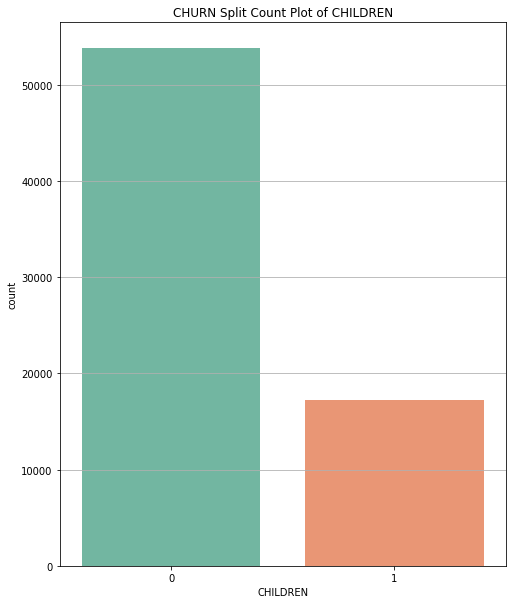

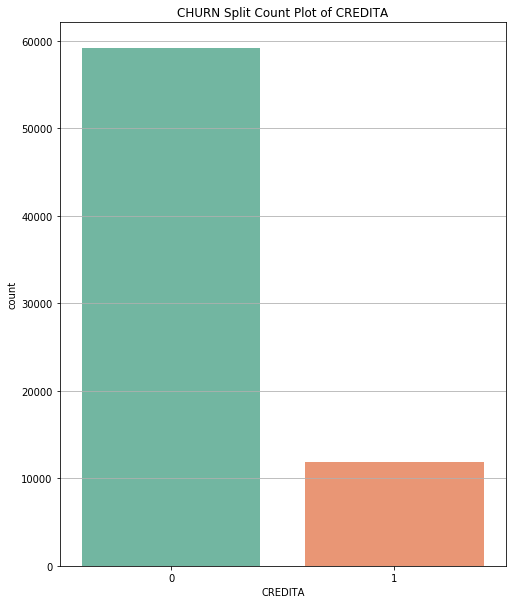

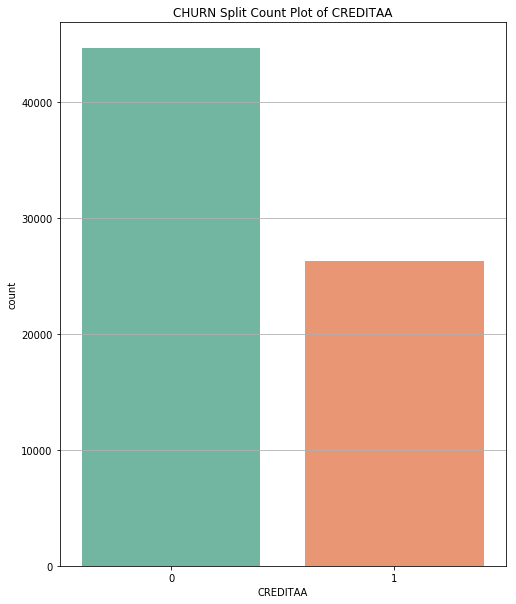

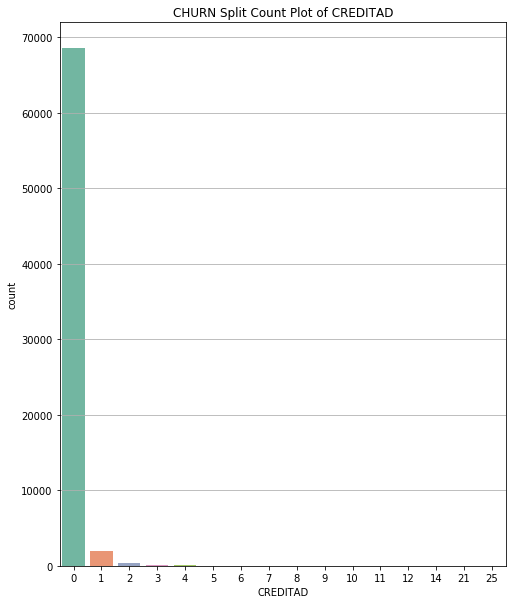

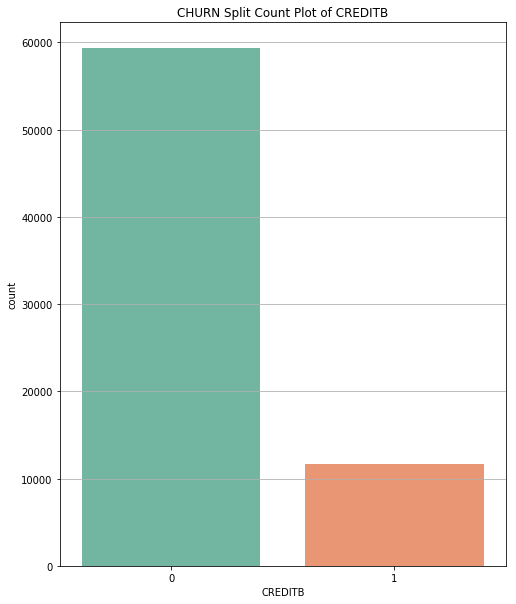

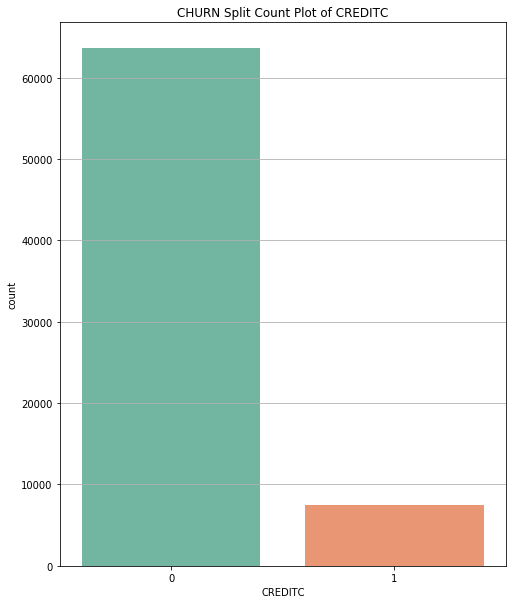

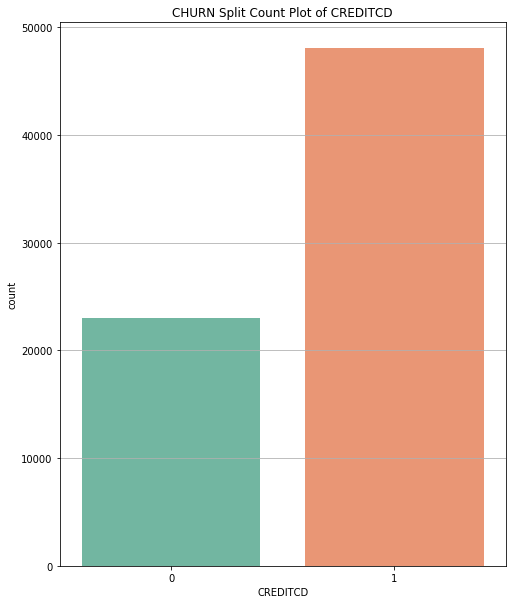

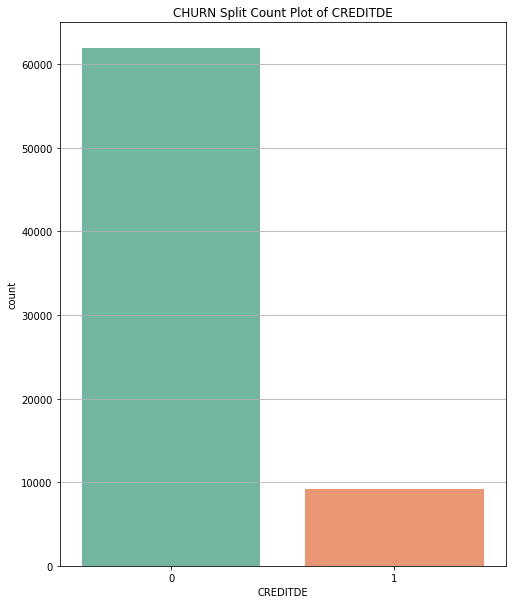

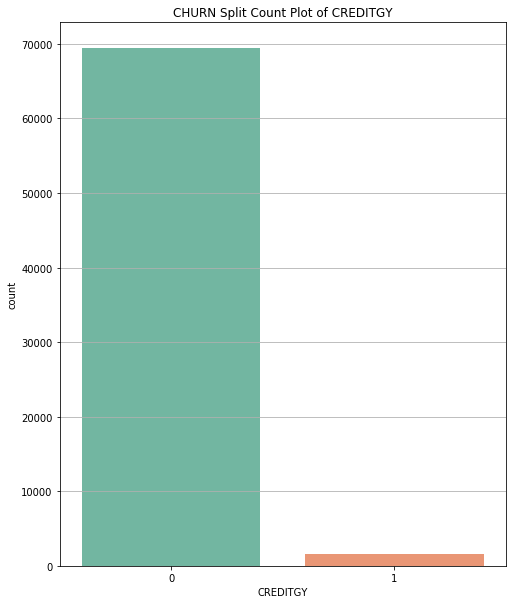

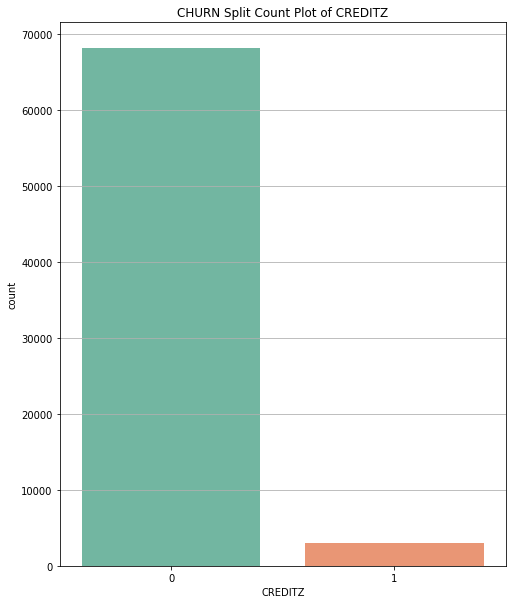

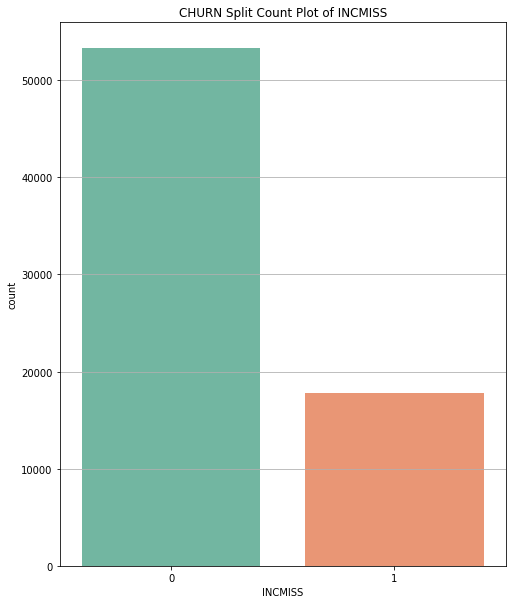

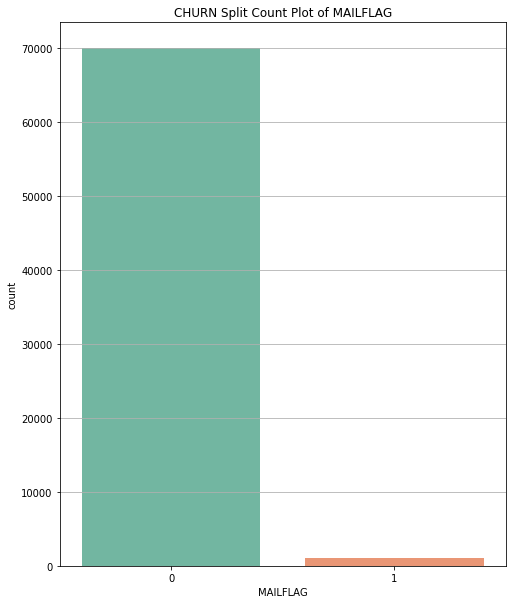

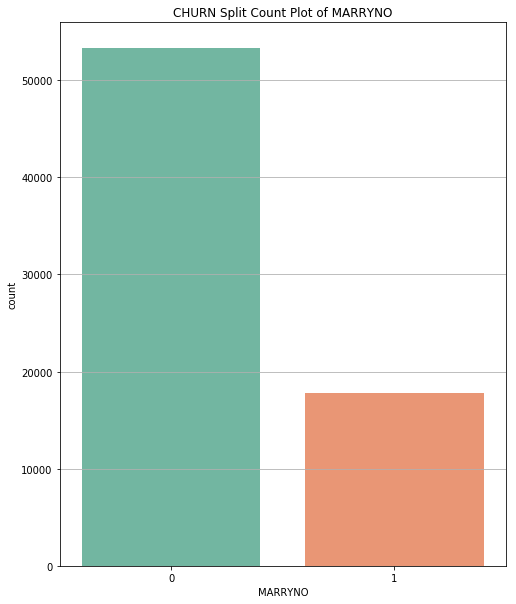

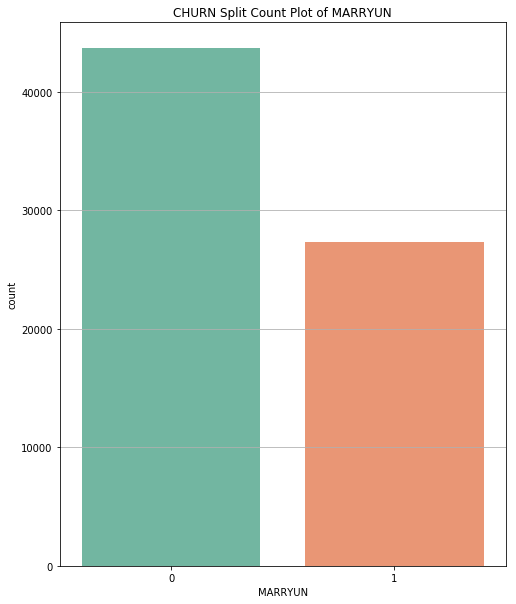

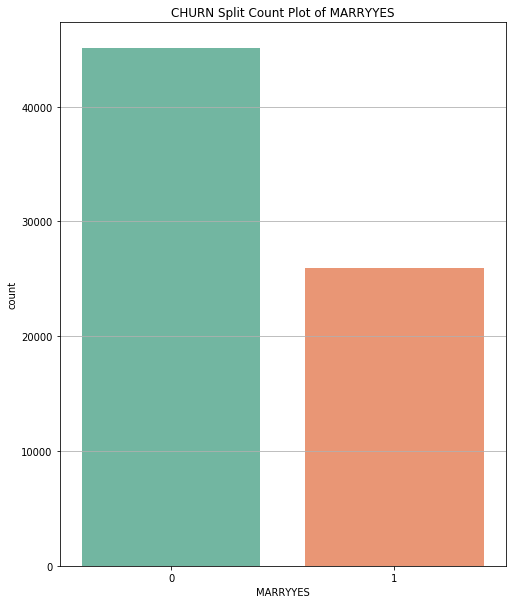

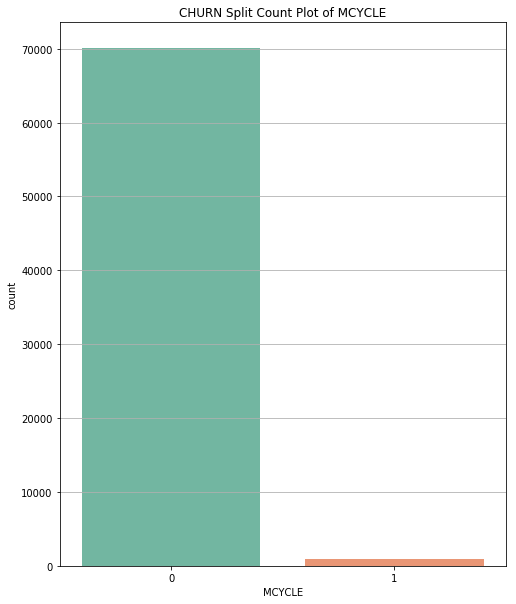

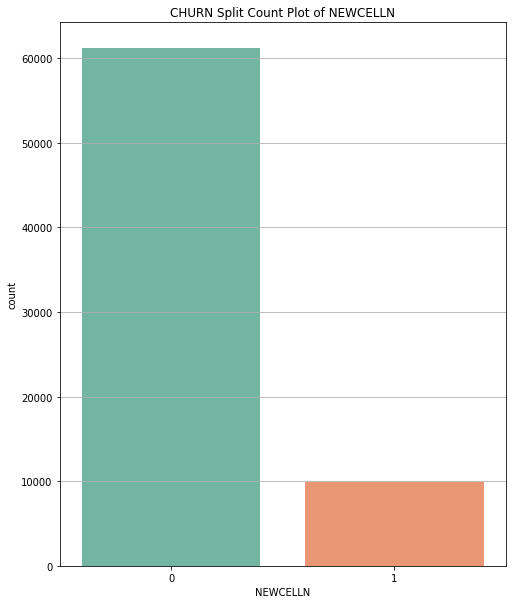

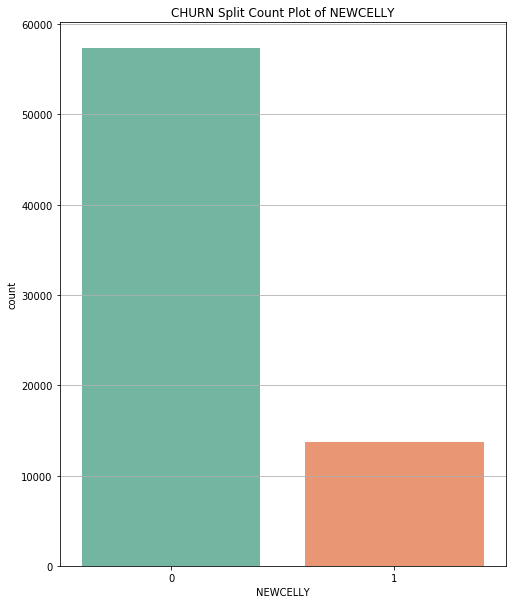

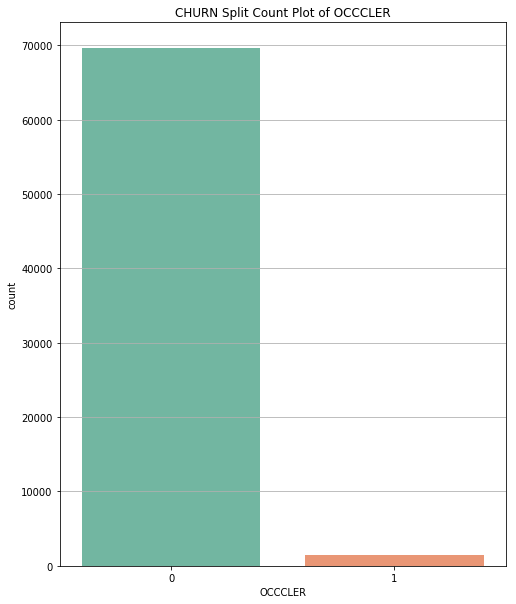

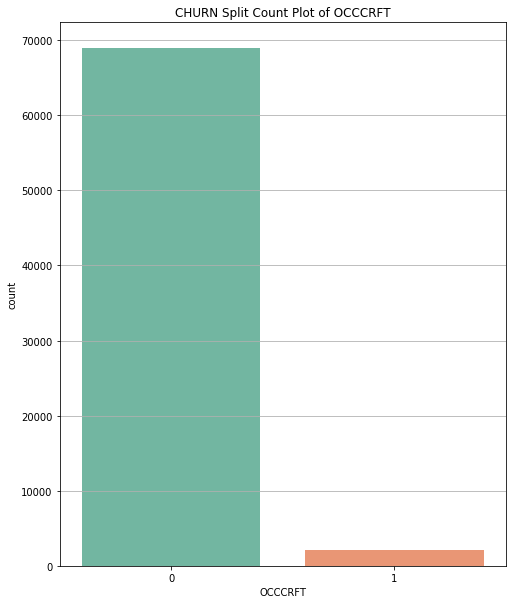

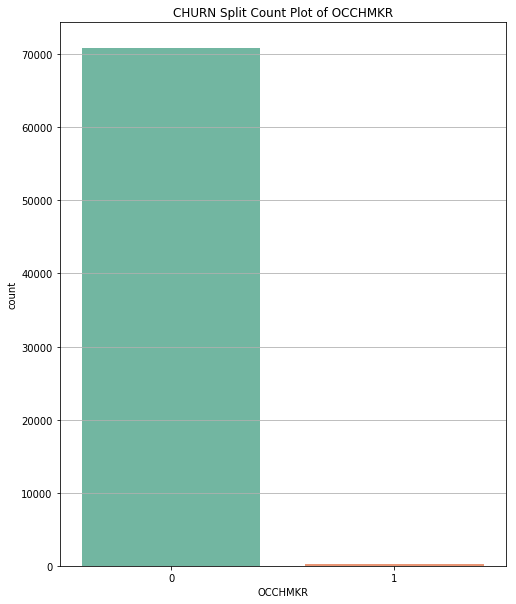

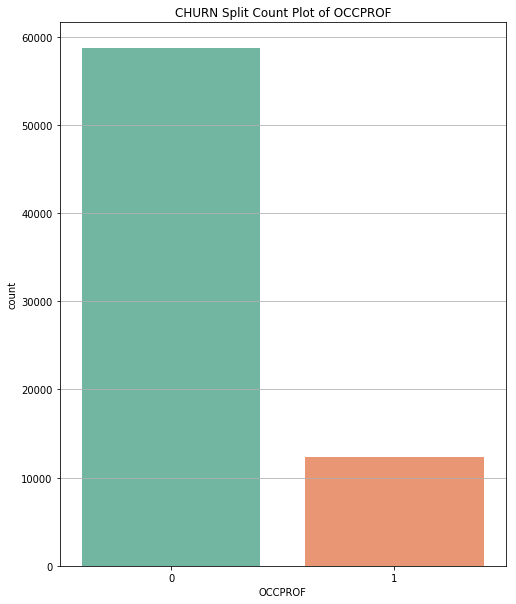

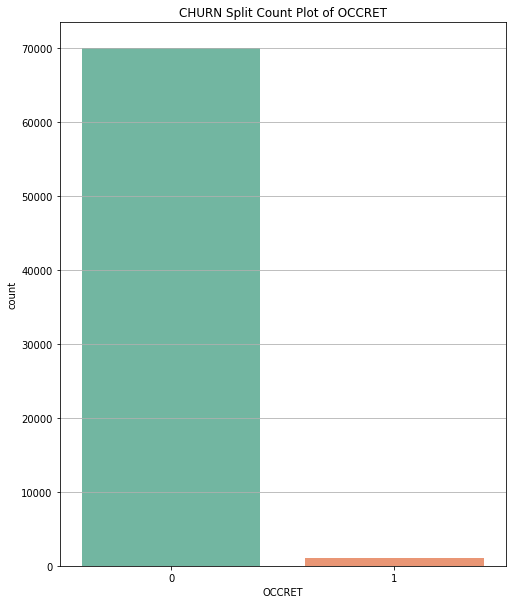

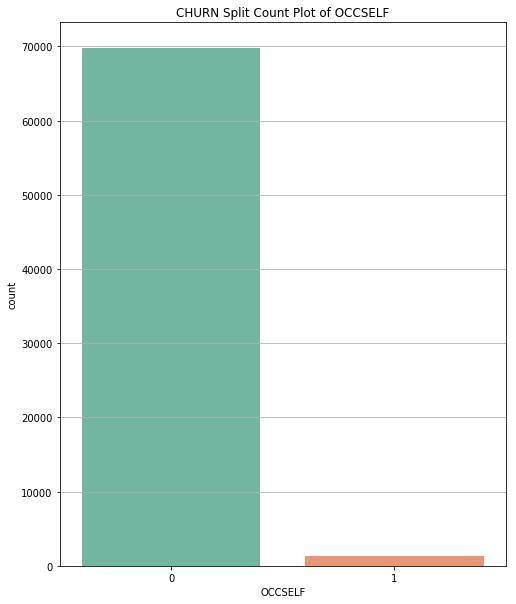

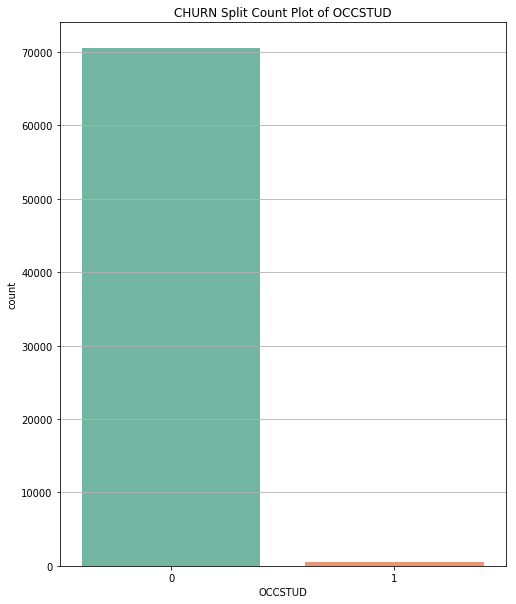

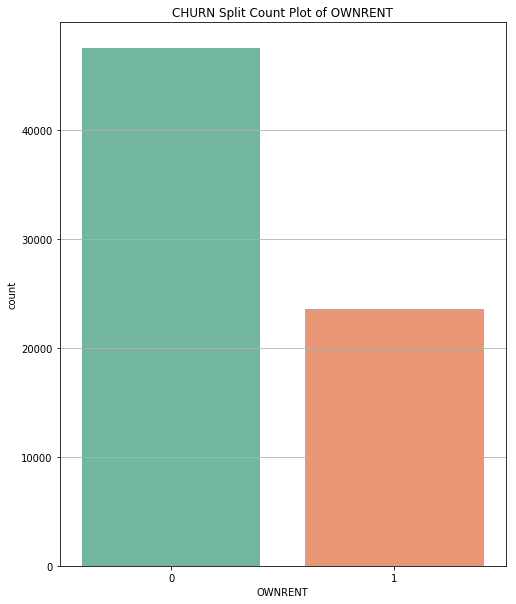

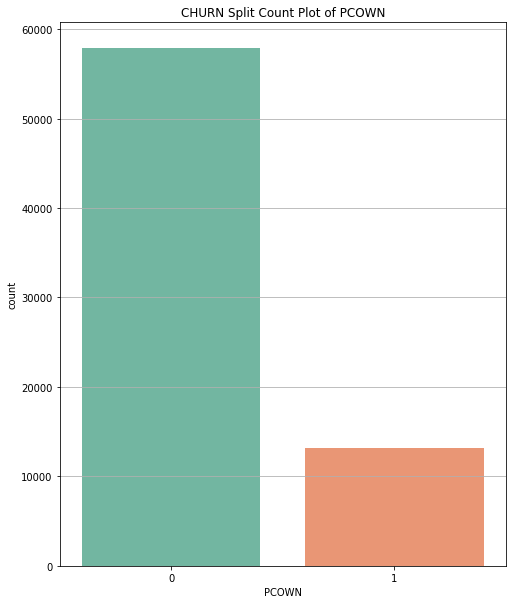

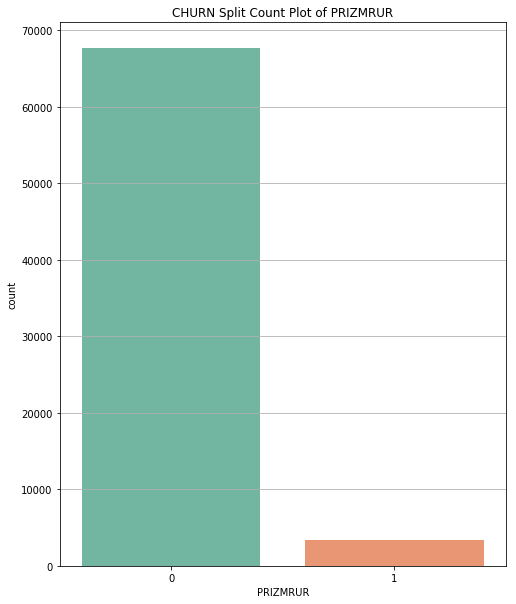

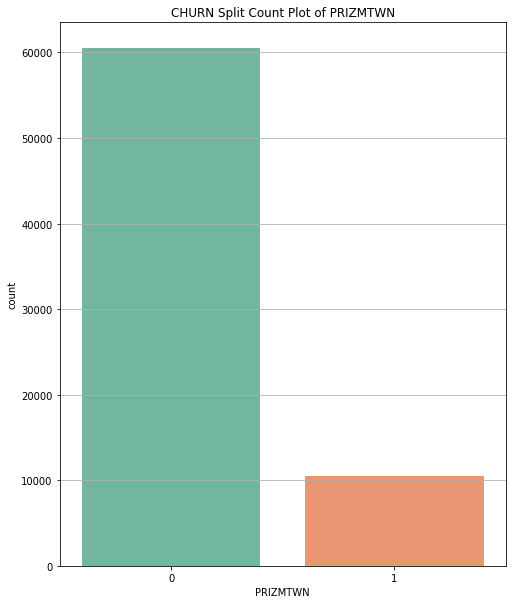

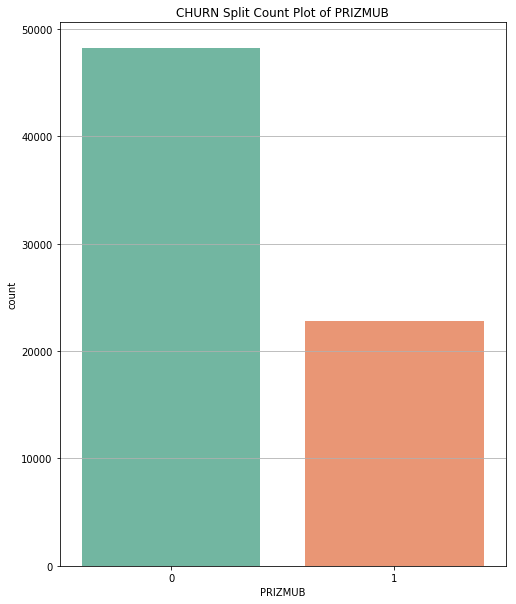

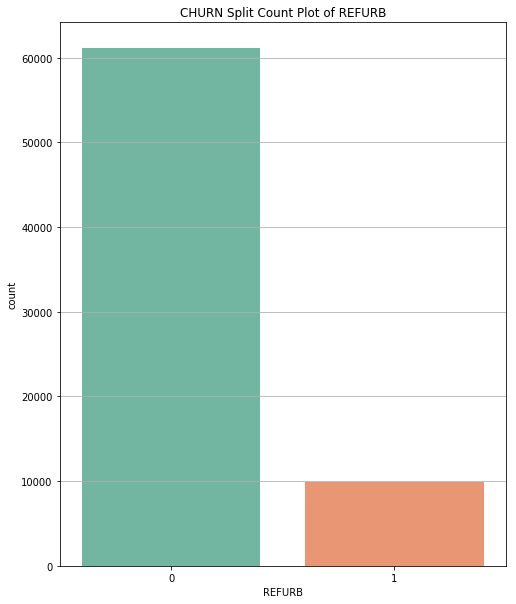

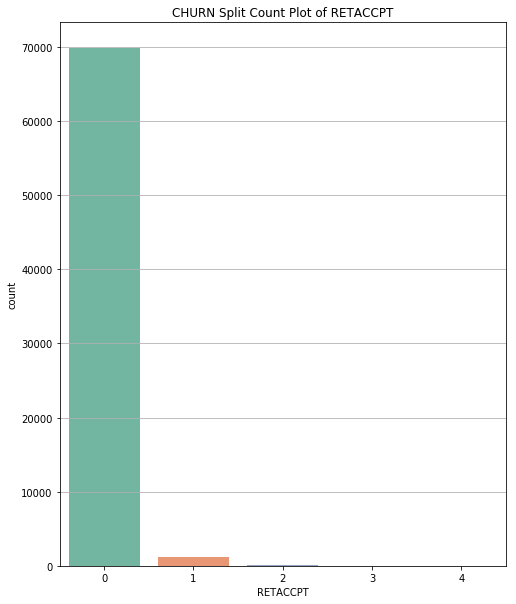

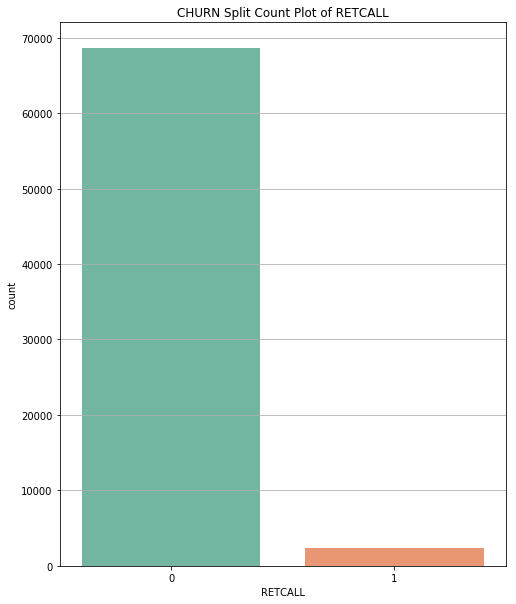

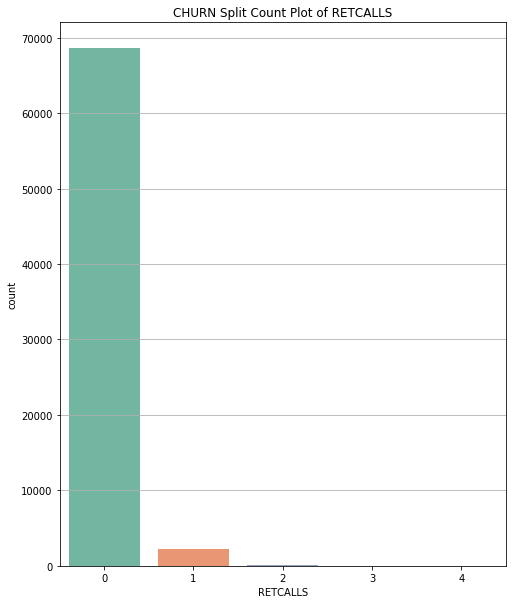

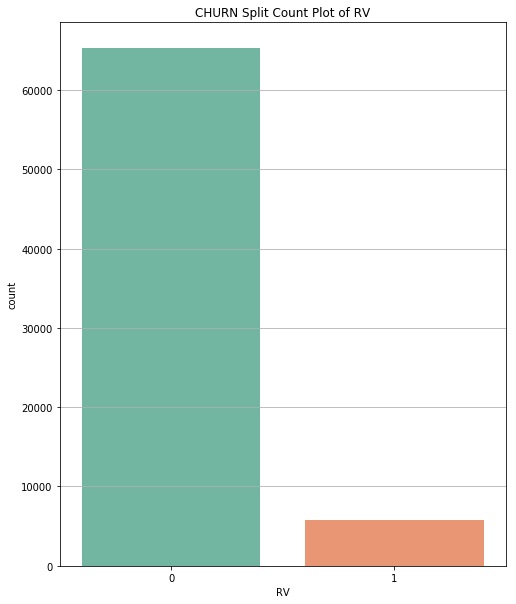

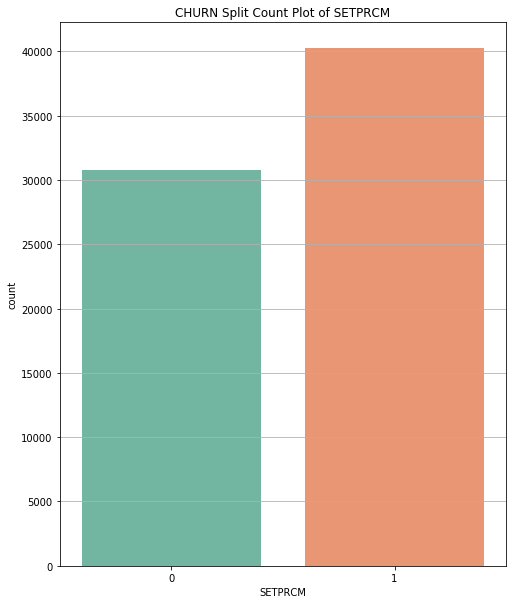

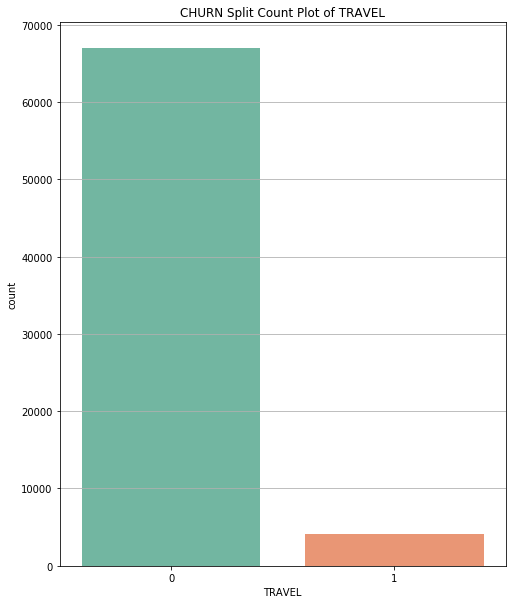

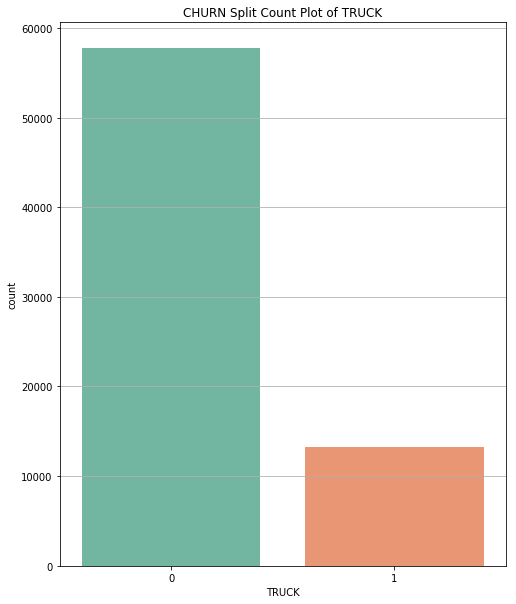

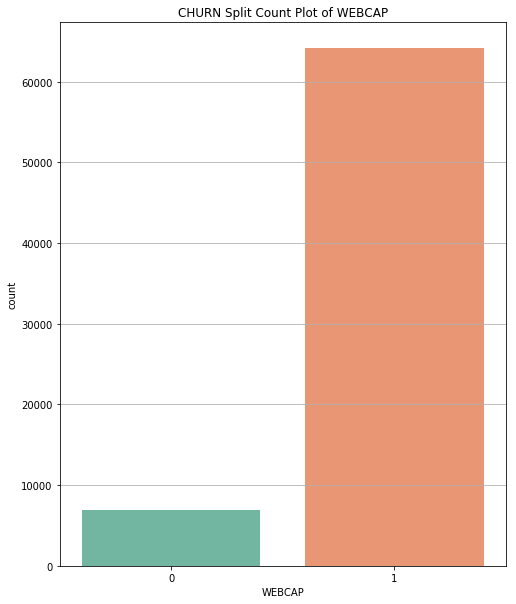

In [136]:
bp = PdfPages('Count Plots  with Attrition Split.pdf')
for cat_variable in cat_var:
    fig,axes = plt.subplots(figsize=(8,10))
    sns.countplot(x=cat_variable, data=pam, palette='Set2')
    plt.title(str('CHURN Split Count Plot of ')+str(cat_variable))
    ax.set(ylabel=str("Y variable ") + str(cat_variable))
    
    plt.show()
    bp.savefig(fig)
bp.close()

In [137]:
 #pandas_profiling.ProfileReport(pam_num)

In [138]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

pam_scaled=sc.fit_transform(pam_num)
pam_scaled

array([[-1.34829927e-02, -7.41874172e-02, -4.15743782e-01, ...,
         2.12228832e-01,  2.05407255e+00, -5.71285842e-01],
       [ 6.33835002e-01,  1.58514079e+00,  1.29953519e+00, ...,
         5.31000567e-01, -4.58017374e-01,  1.06950104e+00],
       [-6.87957531e-01, -9.88868335e-01, -7.55421067e-01, ...,
         1.48731577e+00, -9.91473850e-02,  1.06950104e+00],
       ...,
       [ 2.95189929e-13, -1.36451194e-15,  2.19587840e-12, ...,
         5.31000567e-01,  4.39157599e-01, -5.71285842e-01],
       [ 2.95189929e-13, -1.36451194e-15,  2.19587840e-12, ...,
         1.16854404e+00, -6.37272934e-01, -5.71285842e-01],
       [ 2.95189929e-13, -1.36451194e-15,  2.19587840e-12, ...,
         8.49772302e-01,  7.98027588e-01, -5.71285842e-01]])

[30.59 39.58 46.44 52.45 57.87 63.02 67.6  71.37 74.21 76.83 79.41 81.7
 83.91 86.01 87.73 89.34 90.88 92.14 93.38 94.36 95.25 96.12 96.85 97.55
 98.15 98.69 99.1  99.46 99.78 99.95 99.99 99.99]


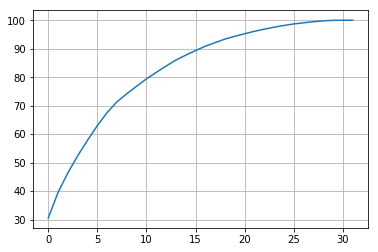

In [139]:
from sklearn.decomposition import PCA
pc = PCA(n_components=32)
pc.fit(pam_scaled)

#The amount of variance that each PC explains
var= pc.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)
print(var1)
plt.plot(var1)

In [140]:
pc_final=PCA(n_components=15).fit(pam_num)

reduced_cr=pc_final.fit_transform(pam_num)
pd.DataFrame(reduced_cr).head(5)

0           1           2           3          4          5   \
0  49479.248970   82.441659 -620.169611  -94.486929  10.671880 -37.397505   
1  49478.611352  941.744730 -143.667729  115.444652  34.498794 -74.408489   
2  49481.242515 -448.495119  -62.876140    2.608628   4.486299  -7.513096   
3  49480.648792 -354.889366  -76.800988 -123.844718 -18.771338  -1.363986   
4  49480.408772 -429.442371  -93.818748 -249.065997   3.784117  -5.254269   

           6           7          8          9         10         11  \
0  -79.838386   75.597062 -73.685503 -20.034947  7.961599   5.536169   
1 -339.223196 -123.181095  17.220269 -16.772820  1.264122  -7.295378   
2   19.575372    8.748654 -13.900651  32.640397 -0.773505   1.979103   
3   19.961716   -7.706898  -9.731716  17.695878  0.732268  42.308129   
4   32.626841  -16.782944 -22.450806 -43.168828  1.560302 -11.999437   

          12        13         14  
0 -10.199377 -6.356363  13.167269  
1  92.465937  2.306118  13.073085  
2  -3.020331 -1.633436  -9.580809  
3  -5.587935 -1.693868  -6.197491  
4  -0.703762  1.769968  -9.891963

In [141]:
col_list=pam_num.columns
col_list

Index(['REVENUE', 'MOU', 'RECCHRGE', 'DIRECTAS', 'OVERAGE', 'ROAM', 'CHANGEM',
       'CHANGER', 'DROPVCE', 'BLCKVCE', 'UNANSVCE', 'CUSTCARE', 'THREEWAY',
       'MOUREC', 'OUTCALLS', 'INCALLS', 'PEAKVCE', 'OPEAKVCE', 'DROPBLK',
       'CALLFWDV', 'CALLWAIT', 'MONTHS', 'UNIQSUBS', 'PHONES', 'MODELS',
       'EQPDAYS', 'CUSTOMER', 'AGE1', 'AGE2', 'INCOME', 'SETPRC', 'ACTVSUBS'],
      dtype='object')

In [142]:
#pc_final.components_

#print pd.DataFrame(pc_final.components_,columns=telco_num.columns).T

Loadings =  pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T,columns=pam_num.columns).T
Loadings.to_csv("Loadings.csv")

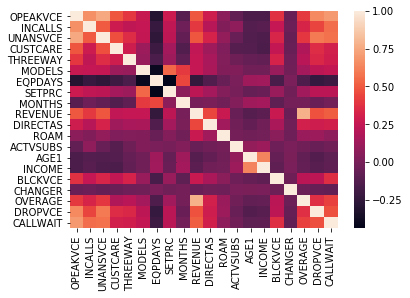

In [143]:
PAM_NUM=pam_num[["OPEAKVCE","INCALLS","UNANSVCE","CUSTCARE","THREEWAY","MODELS","EQPDAYS","SETPRC","MONTHS","REVENUE","DIRECTAS",

          "ROAM","ACTVSUBS","AGE1","INCOME","BLCKVCE","CHANGER","OVERAGE","DROPVCE","CALLWAIT"]]

sns.heatmap(PAM_NUM.corr())

In [92]:
PAM_NUM=pam_num[['REVENUE', 'RECCHRGE', 'DIRECTAS', 'ROAM', 'BLCKVCE', 'CUSTCARE','THREEWAY', 'INCALLS', 'DROPBLK', 'MONTHS', 'UNIQSUBS', 'PHONES', 'MODELS', 'AGE1', 'ACTVSUBS']]

In [144]:
#Data Audit Part for Catagorical variable
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=pam_cat.apply(lambda x: cat_summary(x))
cat_summary

CHILDREN  \
N                                                         71047   
NMISS                                                         0   
ColumnsNames  0    53826
1    17221
Name: CHILDREN, dtype: i...   

                                                        CREDITA  \
N                                                         71047   
NMISS                                                         0   
ColumnsNames  0    59135
1    11912
Name: CREDITA, dtype: int64   

                                                       CREDITAA  \
N                                                         71047   
NMISS                                                         0   
ColumnsNames  0    44697
1    26350
Name: CREDITAA, dtype: i...   

                                                        CREDITB  \
N                                                         71047   
NMISS                                                         0   
ColumnsNames  0    59358
1    11689
Name: CREDITB, dtype: int64   

                                                        CREDITC  \
N                                                         71047   
NMISS                                                         0   
ColumnsNames  0    63627
1     7420
Name: CREDITC, dtype: int64   

                                                       CREDITDE  \
N                                                         71047   
NMISS                                                         0   
ColumnsNames  0    61919
1     9128
Name: CREDITDE, dtype: i...   

                                                       RETCALLS  \
N                                                         71047   
NMISS                                                         0   
ColumnsNames  0    68629
1     2232
2      164
3       19
4 ...   

                                                       CREDITGY  \
N                                                         71047   
NMISS                                                         0   
ColumnsNames  0    69438
1     1609
Name: CREDITGY, dtype: i...   

                                                        CREDITZ  \
N                                                         71047   
NMISS                                                         0   
ColumnsNames  0    68108
1     2939
Name: CREDITZ, dtype: int64   

                                                       PRIZMRUR  \
N                                                         71047   
NMISS                                                         0   
ColumnsNames  0    67655
1     3392
Name: PRIZMRUR, dtype: i...   

                                   ...                         \
N                                  ...                          
NMISS                              ...                          
ColumnsNames                       ...                          

                                                        TRAVEL  \
N                                                        71047   
NMISS                                                        0   
ColumnsNames  0    66963
1     4084
Name: TRAVEL, dtype: int64   

                                                        PCOWN  \
N                                                       71047   
NMISS                                                       0   
ColumnsNames  0    57874
1    13173
Name: PCOWN, dtype: int64   

                                                       CREDITCD  \
N                                                         71047   
NMISS                                                         0   
ColumnsNames  1    48058
0    22989
Name: CREDITCD, dtype: i...   

                                                       NEWCELLY  \
N                                                         71047   
NMISS                                                         0   
ColumnsNames  0    57339
1    13708
Name: NEWCELLY, dtype: i...   

                                        

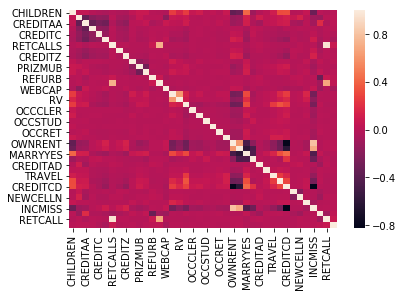

In [145]:
sns.heatmap(pam_cat.corr())

In [146]:
#pam_cat=pam_cat[["CHURN","CREDITB","OCCSTUD","OCCHMKR","NEWCELLY","MCYCLE","RETCALL"]]

In [147]:

#pam_cat=pam_cat.drop(['RETACCPT_1','CREDITDE_1'],axis=1)
#sns.heatmap(pam_cat.corr())

In [148]:
pam_cat.columns

Index(['CHILDREN', 'CREDITA', 'CREDITAA', 'CREDITB', 'CREDITC', 'CREDITDE',
       'RETCALLS', 'CREDITGY', 'CREDITZ', 'PRIZMRUR', 'PRIZMUB', 'PRIZMTWN',
       'REFURB', 'RETACCPT', 'WEBCAP', 'TRUCK', 'RV', 'OCCPROF', 'OCCCLER',
       'OCCCRFT', 'OCCSTUD', 'OCCHMKR', 'OCCRET', 'OCCSELF', 'OWNRENT',
       'MARRYUN', 'MARRYYES', 'MARRYNO', 'CREDITAD', 'MAILFLAG', 'TRAVEL',
       'PCOWN', 'CREDITCD', 'NEWCELLY', 'NEWCELLN', 'MCYCLE', 'INCMISS',
       'SETPRCM', 'RETCALL', 'CHURN'],
      dtype='object')

In [149]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, dataframe):
        self.df = dataframe
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = stats.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

df = pam_cat
df['dummyCat'] = np.random.choice([0, 1], size=(len(df),), p=[0.5, 0.5])

#Initialize ChiSquare Class
cT = ChiSquare(df)

#Feature Selection

for var in pam_cat.columns.difference(['CHURN']):
    cT.TestIndependence(colX=var,colY="CHURN" )


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


CHILDREN is NOT an important predictor. (Discard CHILDREN from model)
CREDITA is IMPORTANT for Prediction
CREDITAA is IMPORTANT for Prediction
CREDITAD is NOT an important predictor. (Discard CREDITAD from model)
CREDITB is IMPORTANT for Prediction
CREDITC is IMPORTANT for Prediction
CREDITCD is IMPORTANT for Prediction
CREDITDE is IMPORTANT for Prediction
CREDITGY is NOT an important predictor. (Discard CREDITGY from model)
CREDITZ is NOT an important predictor. (Discard CREDITZ from model)
INCMISS is IMPORTANT for Prediction
MAILFLAG is NOT an important predictor. (Discard MAILFLAG from model)
MARRYNO is IMPORTANT for Prediction
MARRYUN is IMPORTANT for Prediction
MARRYYES is NOT an important predictor. (Discard MARRYYES from model)
MCYCLE is NOT an important predictor. (Discard MCYCLE from model)
NEWCELLN is NOT an important predictor. (Discard NEWCELLN from model)
NEWCELLY is IMPORTANT for Prediction
OCCCLER is NOT an important predictor. (Discard OCCCLER from model)
OCCCRFT is NOT

In [150]:
pam_cat=pam_cat[['CREDITAA','CREDITA','CREDITB','CREDITC','CREDITDE','INCMISS','MARRYNO','NEWCELLY','OCCRET','PRIZMRUR',
                 'PRIZMTWN',"OCCSTUD","OCCHMKR","MCYCLE",'PRIZMUB','REFURB','RETCALL','SETPRCM','WEBCAP','CHURN']]


In [151]:
#*************************************************************************************

In [152]:
pam_n = pd.concat([PAM_NUM, pam_cat], axis=1)
pam_n.columns


Index(['OPEAKVCE', 'INCALLS', 'UNANSVCE', 'CUSTCARE', 'THREEWAY', 'MODELS',
       'EQPDAYS', 'SETPRC', 'MONTHS', 'REVENUE', 'DIRECTAS', 'ROAM',
       'ACTVSUBS', 'AGE1', 'INCOME', 'BLCKVCE', 'CHANGER', 'OVERAGE',
       'DROPVCE', 'CALLWAIT', 'CREDITAA', 'CREDITA', 'CREDITB', 'CREDITC',
       'CREDITDE', 'INCMISS', 'MARRYNO', 'NEWCELLY', 'OCCRET', 'PRIZMRUR',
       'PRIZMTWN', 'OCCSTUD', 'OCCHMKR', 'MCYCLE', 'PRIZMUB', 'REFURB',
       'RETCALL', 'SETPRCM', 'WEBCAP', 'CHURN'],
      dtype='object')

In [153]:
pam_n.head()

OPEAKVCE  INCALLS  UNANSVCE  CUSTCARE  THREEWAY  MODELS  EQPDAYS  SETPRC  \
0    157.00     6.33     61.33      1.67      0.33     5.0    240.0  149.99   
1    303.67    77.00     76.00      4.33      1.33     4.0    458.0    9.99   
2      1.67     0.00      2.33      0.00      0.00     2.0    601.0   29.99   
3      7.33     0.00      4.00      4.00      0.00     3.0    464.0   29.99   
4      0.67     0.00      0.33      0.00      0.00     2.0    354.0   29.99   

   MONTHS  REVENUE  ...    PRIZMTWN  OCCSTUD  OCCHMKR  MCYCLE  PRIZMUB  \
0    49.0    57.49  ...           0        0        0       0        0   
1    49.0    82.28  ...           0        0        0       0        0   
2    49.0    31.66  ...           0        0        0       0        0   
3    49.0    62.13  ...           0        0        0       0        0   
4    49.0    25.23  ...           0        0        0       0        0   

   REFURB  RETCALL  SETPRCM  WEBCAP  CHURN  
0       0        0        0       1      0  
1       0        0        0       1      0  
2       0        0        0       1      0  
3       0        0        0       1      0  
4       0        0        0       1      0  

[5 rows x 40 columns]

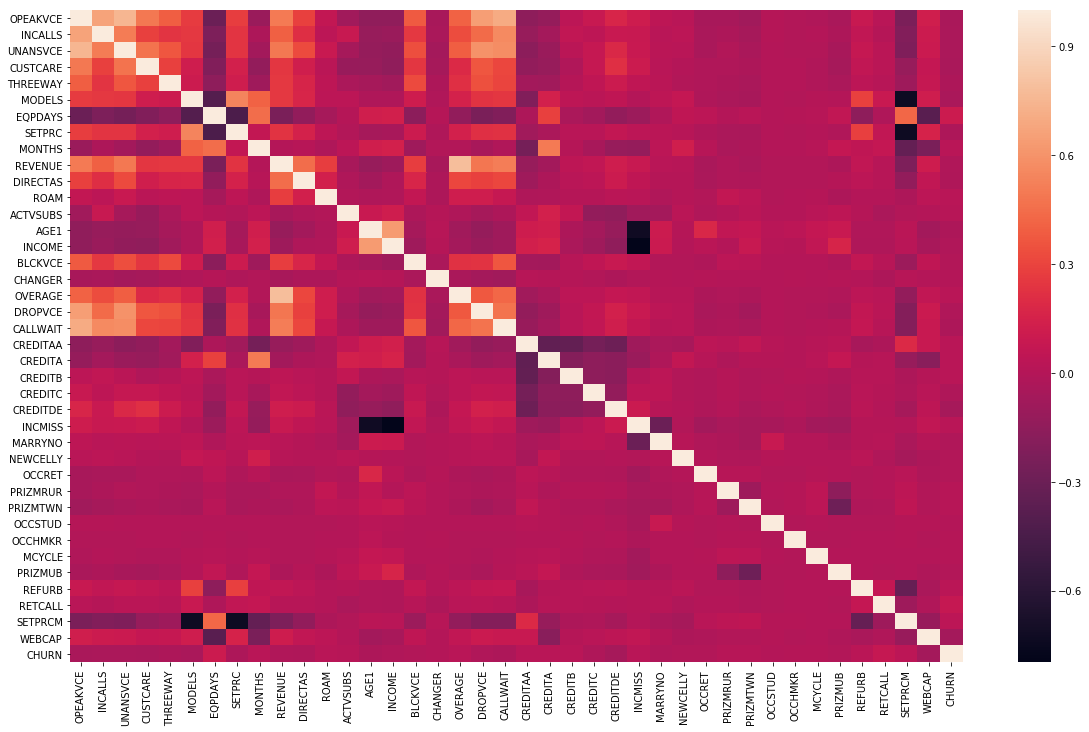

In [154]:
plt.figure(figsize=(20,12))
sns.heatmap(pam_n.corr())


In [155]:
pam_n = pd.concat([pam_n, pam["CHURNDEP"]], axis=1)

In [156]:
Train = pam_n[pam_n.CHURNDEP.isnull()==0]
Test = pam_n[pam_n.CHURNDEP.isnull()==1]



In [157]:
Train=Train.drop(['CHURNDEP'],axis=1)
Test=Test.drop(['CHURNDEP'],axis=1)

In [167]:
feature_columns = Train.columns.difference( ['CHURN'] )
feature_columns


Index(['ACTVSUBS', 'AGE1', 'BLCKVCE', 'CALLWAIT', 'CHANGER', 'CREDITA',
       'CREDITAA', 'CREDITB', 'CREDITC', 'CREDITDE', 'CUSTCARE', 'DIRECTAS',
       'DROPVCE', 'EQPDAYS', 'INCALLS', 'INCMISS', 'INCOME', 'MARRYNO',
       'MCYCLE', 'MODELS', 'MONTHS', 'NEWCELLY', 'OCCHMKR', 'OCCRET',
       'OCCSTUD', 'OPEAKVCE', 'OVERAGE', 'PRIZMRUR', 'PRIZMTWN', 'PRIZMUB',
       'REFURB', 'RETCALL', 'REVENUE', 'ROAM', 'SETPRC', 'SETPRCM', 'THREEWAY',
       'UNANSVCE', 'WEBCAP'],
      dtype='object')

In [168]:
X=Train[feature_columns]
y=Train['CHURN']


Optimal number of features: 39
Selected features: ['ACTVSUBS', 'AGE1', 'BLCKVCE', 'CALLWAIT', 'CHANGER', 'CREDITA', 'CREDITAA', 'CREDITB', 'CREDITC', 'CREDITDE', 'CUSTCARE', 'DIRECTAS', 'DROPVCE', 'EQPDAYS', 'INCALLS', 'INCMISS', 'INCOME', 'MARRYNO', 'MCYCLE', 'MODELS', 'MONTHS', 'NEWCELLY', 'OCCHMKR', 'OCCRET', 'OCCSTUD', 'OPEAKVCE', 'OVERAGE', 'PRIZMRUR', 'PRIZMTWN', 'PRIZMUB', 'REFURB', 'RETCALL', 'REVENUE', 'ROAM', 'SETPRC', 'SETPRCM', 'THREEWAY', 'UNANSVCE', 'WEBCAP']


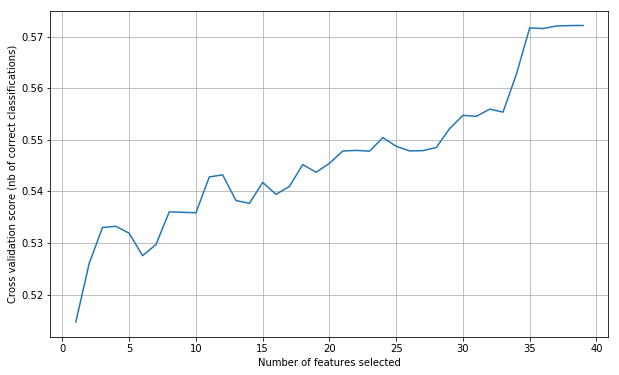

In [169]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')

rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
x = X
y = y
# Build a logreg and compute the feature importances
model = LogisticRegression()
# create the RFE model and select 8 attributes
rfe = RFE(model, 20)
rfe = rfe.fit(x,y)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['ACTVSUBS', 'CREDITB', 'CREDITC', 'CREDITDE', 'INCMISS', 'MARRYNO', 'MCYCLE', 'MODELS', 'NEWCELLY', 'OCCHMKR', 'OCCRET', 'OCCSTUD', 'PRIZMRUR', 'PRIZMUB', 'REFURB', 'RETCALL', 'SETPRCM', 'THREEWAY', 'UNIQSUBS', 'WEBCAP']


In [166]:
Selected_features=['ACTVSUBS', 'CREDITB', 'CREDITC', 'CREDITDE', 'INCMISS', 'MARRYNO', 'MCYCLE', 'MODELS', 'NEWCELLY', 
                   'OCCHMKR', 'OCCRET', 'OCCSTUD', 'PRIZMRUR', 'PRIZMUB', 'REFURB', 'RETCALL', 'SETPRCM', 'THREEWAY', 
                   'UNIQSUBS', 'WEBCAP']
train_X=Train[Selected_features]
train_y=Train['CHURN']

test_X=Test[Selected_features]
test_y=Test['CHURN']

KeyError: "['UNIQSUBS'] not in index"

In [110]:
from sklearn.cross_validation import train_test_split
train_X, test_X, train_y, test_y = train_test_split( X,y,test_size = 0.437,random_state = 123 )

In [111]:
len(train_X)

22520

In [164]:
import statsmodels.api as sm
logit_mod=sm.Logit(train_y,train_X)
result=logit_mod.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.673642
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  CHURN   No. Observations:                40000
Model:                          Logit   Df Residuals:                    39961
Method:                           MLE   Df Model:                           38
Date:                Mon, 06 May 2019   Pseudo R-squ.:                 0.02814
Time:                        20:02:06   Log-Likelihood:                -26946.
converged:                       True   LL-Null:                       -27726.
                                        LLR p-value:                2.670e-303
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ACTVSUBS       0.0258      0.017      1.504      0.133      -0.008       0.060
AGE1          -0.0048      0.

In [124]:
Selected_features=['ACTVSUBS', 'CREDITB', 'CREDITC', 'CREDITDE', 'INCMISS', 'MARRYNO', 'MCYCLE', 'MODELS', 'NEWCELLY', 
                   'OCCHMKR', 'OCCRET', 'OCCSTUD', 'PRIZMRUR', 'PRIZMUB', 'REFURB', 'RETCALL', 'SETPRCM', 
                   'UNIQSUBS',]
train_X=Train[feature_columns]
train_y=Train['CHURN']

test_X=Test[feature_columns]
test_y=Test['CHURN']

In [119]:
# Building Models
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
lg=logreg.fit( train_X, train_y )
y_pred=lg.predict(train_X)
y_pred

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [ ]:
lg.s

In [118]:
logreg.score( train_X, train_y )

0.571475

In [333]:
list( zip( feature_columns, logreg.coef_[0] ) )

[('ACTVSUBS', 0.01977899421155218),
 ('AGE1', -0.005166074601239965),
 ('BLCKVCE', 0.003349091364718763),
 ('CALLWAIT', -0.006853997503899367),
 ('CHANGER', -0.000334751396461713),
 ('CREDITA', 0.03487596271953778),
 ('CREDITAA', 0.05773830336107549),
 ('CREDITB', 0.10128564189962116),
 ('CREDITC', -0.09665590115464344),
 ('CREDITDE', -0.2815537458051196),
 ('CUSTCARE', -0.01180977633678084),
 ('DIRECTAS', -0.011459506368800153),
 ('DROPVCE', 0.008118813914575211),
 ('EQPDAYS', 0.0015580899775750187),
 ('INCALLS', -0.004573037229695015),
 ('INCMISS', -0.12287568388402431),
 ('INCOME', -0.016374363160954874),
 ('MARRYNO', -0.07076205672824896),
 ('MODELS', 0.07281554934665131),
 ('MONTHS', -0.0216522085741703),
 ('NEWCELLY', -0.07806199528025047),
 ('OCCRET', -0.08954583114009351),
 ('OVERAGE', 0.002439941778603427),
 ('PRIZMRUR', 0.0658530837136352),
 ('PRIZMTWN', 0.036134569513334124),
 ('PRIZMUB', -0.04231286659818096),
 ('REFURB', 0.2321950008314435),
 ('RETCALL', 0.8246179576205647

In [334]:
# constant C
logreg.intercept_

array([0.171])

In [335]:
logreg.predict_proba(test_X)

array([[0.723, 0.277],
       [0.744, 0.256],
       [0.595, 0.405],
       ...,
       [0.435, 0.565],
       [0.406, 0.594],
       [0.476, 0.524]])

In [355]:
#Predicting the train cases
train_pred = pd.DataFrame( { 'actual':  train_y,
                            'predicted': logreg.predict( train_X ) } )
train_pred.head(10)

actual  predicted
31047       0          1
31048       0          0
31049       0          0
31050       0          1
31051       0          0
31052       0          0
31053       0          0
31054       0          0
31055       0          0
31056       0          0

In [336]:
#Predicting the test cases
test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': logreg.predict( test_X ) } )
test_pred.head(10)

actual  predicted
0       0          0
1       0          0
2       0          0
3       0          0
4       0          0
5       0          0
6       0          1
7       0          0
8       0          0
9       0          0

In [337]:
test_pred = test_pred.reset_index()
test_pred.head()

index  actual  predicted
0      0       0          0
1      1       0          0
2      2       0          0
3      3       0          0
4      4       0          0

In [338]:
# Creating a confusion matrix

from sklearn import metrics
cm = metrics.confusion_matrix( test_pred.actual,
                            test_pred.predicted, [1,0] )
print(cm)

[[  339   270]
 [12479 17959]]


Text(0.5,28.3611,'Predicted label')

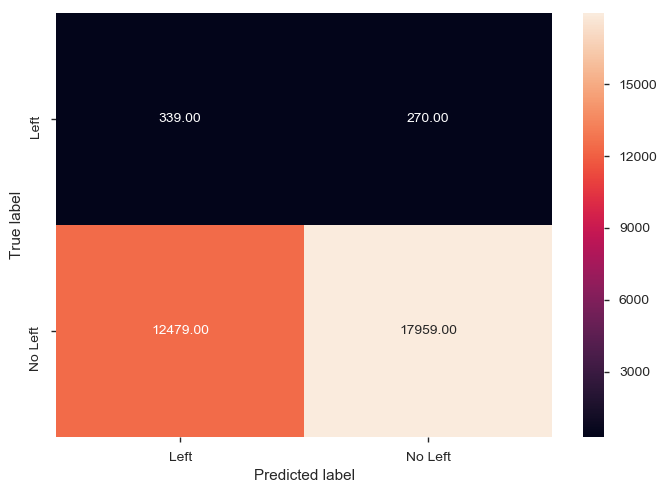

In [339]:
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [340]:
score = metrics.accuracy_score( test_pred.actual, test_pred.predicted )
round( float(score), 2 )


0.59

In [341]:
# Predit Probability
print (test_X[:3])
print (logreg.predict_proba( test_X[:3] ))

   ACTVSUBS  AGE1  BLCKVCE  CALLWAIT  CHANGER  CREDITA  CREDITAA  CREDITB  \
0       1.0  30.0     1.00      5.67    50.99        0         0        0   
1       2.0  30.0     7.67     22.67     8.14        0         0        0   
2       2.0  52.0     1.00      0.00     4.03        1         0        0   

   CREDITC  CREDITDE   ...    PRIZMUB  REFURB  RETCALL  REVENUE  ROAM  SETPRC  \
0        0         1   ...          0       0        0    57.49   0.0  149.99   
1        1         0   ...          0       0        0    82.28   0.0    9.99   
2        0         0   ...          0       0        0    31.66   0.0   29.99   

   SETPRCM  THREEWAY  UNANSVCE  WEBCAP  
0        0      0.33     61.33       1  
1        0      1.33     76.00       1  
2        0      0.00      2.33       1  

[3 rows x 35 columns]
[[0.723 0.277]
 [0.744 0.256]
 [0.595 0.405]]


In [342]:
#How good the model is?
predict_proba_df = pd.DataFrame( logreg.predict_proba( test_X ) )
predict_proba_df.head()

0         1
0  0.723383  0.276617
1  0.743673  0.256327
2  0.595443  0.404557
3  0.679020  0.320980
4  0.629438  0.370562

In [343]:
test_pred = pd.concat( [test_pred, predict_proba_df], axis = 1 )

In [344]:
test_pred.columns = ['index', 'actual', 'predicted', 'Left_0', 'Left_1']

In [345]:
test_pred.head()

index  actual  predicted    Left_0    Left_1
0      0       0          0  0.723383  0.276617
1      1       0          0  0.743673  0.256327
2      2       0          0  0.595443  0.404557
3      3       0          0  0.679020  0.320980
4      4       0          0  0.629438  0.370562

In [346]:
auc_score = metrics.roc_auc_score( test_pred.actual, test_pred.Left_1  )
round( float( auc_score ), 2 )

0.61

C:\Users\HP\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


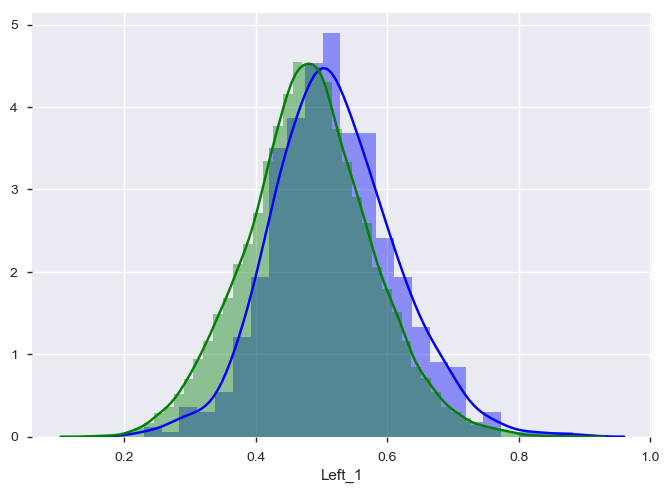

In [347]:
sns.distplot( test_pred[test_pred.actual == 1]["Left_1"], color = 'b' )
sns.distplot( test_pred[test_pred.actual == 0]["Left_1"], color = 'g' )

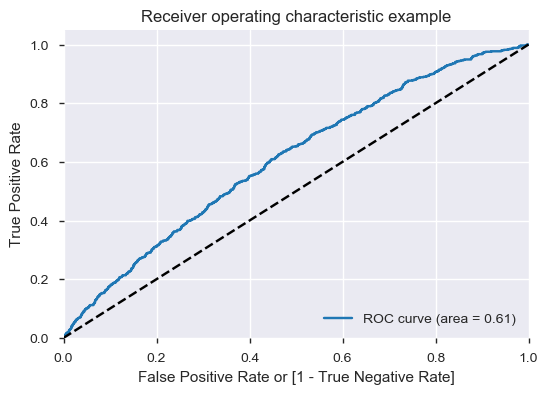

In [348]:
# Finding the optimal cutoff probability
fpr, tpr, thresholds = metrics.roc_curve( test_pred.actual,
                                     test_pred.Left_1,
                                     drop_intermediate = False )

plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [349]:
cutoff_prob = thresholds[(np.abs(tpr - 1)).argmin()]

In [350]:
round( float( cutoff_prob ), 2 )

0.23

In [351]:
#Predicting with new cut-off probability
test_pred['new_labels'] = test_pred['Left_1'].map( lambda x: 1 if x >= 0.23 else 0 )

In [352]:
test_pred[0:10]

index  actual  predicted    Left_0    Left_1  new_labels
0      0       0          0  0.723383  0.276617           1
1      1       0          0  0.743673  0.256327           1
2      2       0          0  0.595443  0.404557           1
3      3       0          0  0.679020  0.320980           1
4      4       0          0  0.629438  0.370562           1
5      5       0          0  0.550295  0.449705           1
6      6       0          1  0.495663  0.504337           1
7      7       0          0  0.697316  0.302684           1
8      8       0          0  0.681740  0.318260           1
9      9       0          0  0.687833  0.312167           1

Text(0.5,28.3611,'Predicted label')

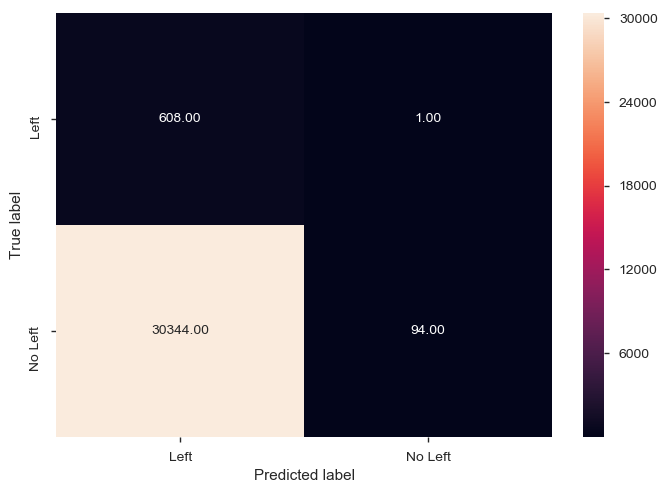

In [353]:

cm = metrics.confusion_matrix( test_pred.actual,
                          test_pred.new_labels, [1,0] )
sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [354]:
print("Accuracy:",metrics.accuracy_score(test_y, logreg.predict( test_X ) ))
print("Precision:",metrics.precision_score(test_y, logreg.predict( test_X ) ))
print("Recall:",metrics.recall_score(test_y, logreg.predict( test_X )))

Accuracy: 0.5893645118691017
Precision: 0.026447183647995007
Recall: 0.5566502463054187


In [ ]:
train_gini = 2*metrics.roc_auc_score(train_y, result.predict()) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)
test_gini = 2*metrics.roc_auc_score(test_y, result.predict(test_X)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

In [ ]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_predict.actual, train_predict.predicted))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_predict.actual, test_predict.predicted))

In [ ]:
train_predict['Deciles']=pd.qcut(train_predict['prob'],10, labels=False)
#test['Deciles']=pd.qcut(test['prob'],10, labels=False)
train_predict.head()


In [ ]:
test_pred['Deciles']=pd.qcut(test_pred['prob'],10, labels=False)
df2=test_predict.loc[:, ['prob']].groupby(test_predict.Deciles).agg(['max','min']).reset_index()
df2['bad']=test_predict.predicted.groupby(test_predict.Deciles).agg('sum')
df2['Good']=test_predict.predicted.groupby(test_predict.Deciles).agg('count')-test_predict.predicted.groupby(test_predict.Deciles).agg('sum')
df2